# **Maestría en Analítica de Negocios**

## **Curso: Liderazgo y gestión para la transformación organizacional**

### **Home Credit Default Risk**

**Equipo:**
 * Diana Alba - A01451653
 * Melissa Cabrera - A00817200
 * Karen San Roman - A01274762
 * Norma Sarahí Jasso - A00813075

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [2]:
# pip install numpy==1.18.5

In [3]:
#from google.colab import files
#from google.colab import files
#uploaded = files.upload()

In [4]:
#se descarta uso de df_test debido a que no tiene la var target
# df_test = pd.read_csv("application_test.csv",sep=',')
# df_test.head()

In [5]:
df_train = pd.read_csv("/content/application_train.csv")
pd.set_option("display.max_columns",None)
df_train.shape

(307511, 122)

In [6]:
X = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state=1, stratify=y)

#This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided by parameter stratify.
#if y is the dependent variable or target\label column within dataframe following values:

   # 0 25% data is zeros
   #1 75% data is ones

#Then stratify=y will make sure that your random split has:

   # 25% of 0's
   # 75% of 1's

In [7]:
print(Xtrain.shape)
print(Xtest.shape)

(246008, 121)
(61503, 121)


In [8]:
df_train=pd.concat([Xtrain, ytrain], axis=1)
df_test=pd.concat([Xtest, ytest], axis=1)

In [9]:
print(df_train.shape)
print(df_test.shape)

(246008, 122)
(61503, 122)


# 1. ANÁLISIS EXPLORATORIO Y LIMPIEZA

# 1.1. Análisis de datos de entrenamiento

In [10]:
df_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
157774,282879,Cash loans,M,Y,Y,1,126000.0,852088.5,38632.5,688500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.008068,-9609,-758,-738.0,-1940,13.0,1,1,0,1,0,0,Low-skill Laborers,3.0,3,3,SATURDAY,6,0,0,0,1,1,0,Self-employed,0.131004,0.055912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
226786,362689,Cash loans,M,Y,Y,1,166500.0,270000.0,11893.5,270000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-15172,-378,-566.0,-4125,13.0,1,1,0,1,1,0,Laborers,3.0,2,2,THURSDAY,13,0,1,1,0,1,1,Industry: type 9,0.327692,0.520944,0.312365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1354.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
59166,168578,Cash loans,M,Y,Y,0,202500.0,247275.0,17338.5,225000.0,Family,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.046220,-23953,365243,-11298.0,-4545,0.0,1,0,0,1,0,0,NaN,2.0,1,1,THURSDAY,18,0,0,0,0,0,0,XNA,NaN,0.099251,NaN,0.1639,0.1395,0.9771,0.6872,0.0625,0.0,0.2759,0.1667,0.2083,NaN,0.1336,0.1431,0.0000,NaN,0.1670,0.1448,0.9772,0.6994,0.0631,0.0,0.2759,0.1667,0.2083,NaN,0.1460,0.1491,0.0000,NaN,0.1655,0.1395,0.9771,0.6914,0.0629,0.0,0.2759,0.1667,0.2083,NaN,0.1360,0.1457,0.0000,NaN,NaN,block of flats,0.1743,Panel,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
275596,419375,Cash loans,M,N

In [11]:
df_train.shape

(246008, 122)

In [12]:
estadisticos=df_train.describe()
estadisticos.round(1)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
count,246008.0,246008.0,246008.0,246008.0,245998.0,245795.0,246008.0,246008.0,246008.0,246008.0,246008.0,83729.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246006.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,107267.0,245475.0,197243.0,121221.0,102096.0,126061.0,82337.0,74034.0,114948.0,122201.0,123639.0,79009.0,99970.0,77771.0,122612.0,75107.0,110263.0,121221.0,102096.0,126061.0,82337.0,74034.0,114948.0,122201.0,123639.0,79009.0,99970.0,77771.0,122612.0,75107.0,110263.0,121221.0,102096.0,126061.0,82337.0,74034.0,114948.0,122201.0,123639.0,79009.0,99970.0,77771.0,122612.0,75107.0,110263.0,127324.0,245181.0,245181.0,245181.0,245181.0,246007.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,246008.0,212699.0,212699.0,212699.0,212699.0,212699.0,212699.0,246008.0
mean,277990.7,0.4,168745.2,599144.2,27115.9,538501.1,0.0,-16039.4,63705.2,-4986.6,-2994.7,12.1,1.0,0.8,0.2,1.0,0.3,0.1,2.2,2.1,2.0,12.1,0.0,0.1,0.0,0.1,0.2,0.2,0.5,0.5,0.5,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,0.1,1.0,0.8,0.0,0.1,0.1,0.2,0.2,0.1,0.1,0.1,0.0,0.0,0.1,1.4,0.1,1.4,0.1,-964.0,0.0,0.7,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,1.9,0.1
std,102837.4,0.7,259961.1,402546.2,14501.8,369493.5,0.0,4364.1,141185.3,3523.5,1510.0,12.0,0.0,0.4,0.4,0.0,0.4,0.2,0.9,0.5,0.5,3.3,0.1,0.2,0.2,0.3,0.4,0.4,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.1,0.1,2.4,0.4,2.4,0.4,827.7,0.0,0.5,0.0,0.1,0.3,0.0,0.3,0.1,0.0,0.1,0.0,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.2,0.9,0.8,1.9,0.3
min,100002.0,0.0,25650.0,45000.0,1615.5,40500.0,0.0,-25229.0,-17912.0,-23738.0,-7197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [13]:
pd.set_option("display.max_rows",None)
df_train.dtypes

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [14]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [15]:
#cantidad de unicos por variables, para evidenciar si hay mas de un ID u otra variable que no aportara valor
print("\nCantidad de unicos por variable mayores al 80%:")
resumen_porcentajes = []

for columna in df_train.columns:

    #conteo de valores únicos y porcentaje
    conteo_unicos = df_train[columna].nunique()
    porcentaje = df_train[columna].nunique() / df_train[columna].value_counts().sum()* 100

    # Se almacena info en lista
    resumen_porcentajes.append({'Columna': columna, 'Conteo de Únicos': conteo_unicos, 'Porcentaje': porcentaje})

tabla_resumen = pd.DataFrame(resumen_porcentajes)
tabla_resumen = tabla_resumen[tabla_resumen['Porcentaje']>80 ] #se filtran los mayores a 80
tabla_resumen



Cantidad de unicos por variable mayores al 80%:


,Columna,Conteo de Únicos,Porcentaje
0,SK_ID_CURR,246008,100.000000
40,EXT_SOURCE_1,94463,88.063431


In [16]:
#variables con nulos
nulos=df_train.isna().sum().sort_values(ascending=False)
nulosP=(df_train.isna().sum()*100/len(df_train)).sort_values(ascending=False)
nulos_tabla = pd.concat([nulos, nulosP], axis=1)
nulos_tabla.columns=['Cant Nulos','%']
nulos_tabla=nulos_tabla[nulos_tabla['Cant Nulos']>0]
nulos_tabla['%'] = nulos_tabla['%'].apply(lambda x: '{:.2f}%'.format(x))
print(nulos_tabla.shape)
print(nulos_tabla)

(67, 2)
                              Cant Nulos       %
COMMONAREA_MEDI                   171974  69.91%
COMMONAREA_MODE                   171974  69.91%
COMMONAREA_AVG                    171974  69.91%
NONLIVINGAPARTMENTS_AVG           170901  69.47%
NONLIVINGAPARTMENTS_MODE          170901  69.47%
NONLIVINGAPARTMENTS_MEDI          170901  69.47%
FONDKAPREMONT_MODE                168273  68.40%
LIVINGAPARTMENTS_AVG              168237  68.39%
LIVINGAPARTMENTS_MEDI             168237  68.39%
LIVINGAPARTMENTS_MODE             168237  68.39%
FLOORSMIN_MEDI                    166999  67.88%
FLOORSMIN_MODE                    166999  67.88%
FLOORSMIN_AVG                     166999  67.88%
YEARS_BUILD_MEDI                  163671  66.53%
YEARS_BUILD_AVG                   163671  66.53%
YEARS_BUILD_MODE                  163671  66.53%
OWN_CAR_AGE                       162279  65.96%
LANDAREA_AVG                      146038  59.36%
LANDAREA_MODE                     146038  59.36%
LANDAREA_MED

In [17]:
# Se eliminan variables con más del 47% de nulos
df_train= df_train.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI',
'FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE',
'LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE',
'NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','WALLSMATERIAL_MODE',
'APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG',
'LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE'], axis=1)


df_test= df_test.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI',
'FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE',
'LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE',
'NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','WALLSMATERIAL_MODE',
'APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG',
'LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE'], axis=1)


In [18]:
df_train.shape

(246008, 74)

Clientes con dificultades de pago: 19860, (8.07%)
Clientes sin dificultades de pago: 226148, (91.93%)


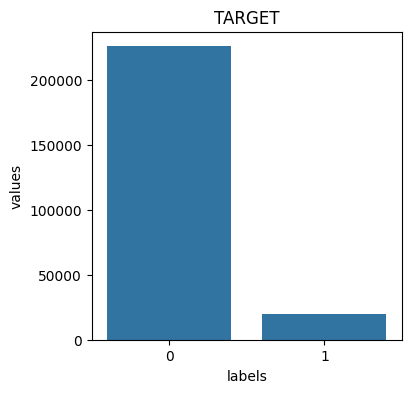

In [19]:
#checar el balanceo de datos
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (4,4))
plt.title('TARGET')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
y_value_counts = df_train['TARGET'].value_counts()

percentage_difficulties = (y_value_counts[1] / (y_value_counts[1] + y_value_counts[0])) * 100
percentage_no_difficulties = (y_value_counts[0] / (y_value_counts[1] + y_value_counts[0])) * 100

print("Clientes con dificultades de pago: {}, ({:.2f}%)".format(y_value_counts[1], percentage_difficulties))
print("Clientes sin dificultades de pago: {}, ({:.2f}%)".format(y_value_counts[0], percentage_no_difficulties))


plt.show()

Acá podemos ver que las etiquetas se encuentran muy desbalanceadas, siendo que la clase 1 (Clientes con dificultades de pago) representa el 8.07% del total de datos y la clase 0 (Clientes sin dificultades de pago) representa el 91.93%.

In [20]:
cat_nominal_vars= ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']


In [21]:
numeric_vars= ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','EXT_SOURCE_1',
'EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [22]:
binarias=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE',
'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [23]:
cat_ordinales=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

In [24]:
#se cambia formato de variables para ser legibles para graficos y concordando con la lista de variables definidas
df_train['FLAG_MOBIL'] = df_train['FLAG_MOBIL'].astype(str)
df_train['FLAG_WORK_PHONE'] = df_train['FLAG_WORK_PHONE'].astype(str)
df_train['FLAG_EMP_PHONE'] = df_train['FLAG_EMP_PHONE'].astype(str)
df_train['FLAG_CONT_MOBILE'] = df_train['FLAG_CONT_MOBILE'].astype(str)
df_train['FLAG_PHONE'] = df_train['FLAG_PHONE'].astype(str)
df_train['FLAG_EMAIL'] = df_train['FLAG_EMAIL'].astype(str)
df_train['REG_REGION_NOT_LIVE_REGION'] = df_train['REG_REGION_NOT_LIVE_REGION'].astype(str)
df_train['REG_REGION_NOT_WORK_REGION'] = df_train['REG_REGION_NOT_WORK_REGION'].astype(str)
df_train['LIVE_REGION_NOT_WORK_REGION'] = df_train['LIVE_REGION_NOT_WORK_REGION'].astype(str)
df_train['REG_CITY_NOT_LIVE_CITY'] = df_train['REG_CITY_NOT_LIVE_CITY'].astype(str)
df_train['REG_CITY_NOT_WORK_CITY'] = df_train['REG_CITY_NOT_WORK_CITY'].astype(str)
df_train['LIVE_CITY_NOT_WORK_CITY'] = df_train['LIVE_CITY_NOT_WORK_CITY'].astype(str)
df_train['FLAG_DOCUMENT_2'] = df_train['FLAG_DOCUMENT_2'].astype(str)
df_train['FLAG_DOCUMENT_3'] = df_train['FLAG_DOCUMENT_3'].astype(str)
df_train['FLAG_DOCUMENT_4'] = df_train['FLAG_DOCUMENT_4'].astype(str)
df_train['FLAG_DOCUMENT_5'] = df_train['FLAG_DOCUMENT_5'].astype(str)
df_train['FLAG_DOCUMENT_6'] = df_train['FLAG_DOCUMENT_6'].astype(str)
df_train['FLAG_DOCUMENT_7'] = df_train['FLAG_DOCUMENT_7'].astype(str)
df_train['FLAG_DOCUMENT_8'] = df_train['FLAG_DOCUMENT_8'].astype(str)
df_train['FLAG_DOCUMENT_9'] = df_train['FLAG_DOCUMENT_9'].astype(str)
df_train['FLAG_DOCUMENT_10'] = df_train['FLAG_DOCUMENT_10'].astype(str)
df_train['FLAG_DOCUMENT_11'] = df_train['FLAG_DOCUMENT_11'].astype(str)
df_train['FLAG_DOCUMENT_12'] = df_train['FLAG_DOCUMENT_12'].astype(str)
df_train['FLAG_DOCUMENT_13'] = df_train['FLAG_DOCUMENT_13'].astype(str)
df_train['FLAG_DOCUMENT_14'] = df_train['FLAG_DOCUMENT_14'].astype(str)
df_train['FLAG_DOCUMENT_15'] = df_train['FLAG_DOCUMENT_15'].astype(str)
df_train['FLAG_DOCUMENT_16'] = df_train['FLAG_DOCUMENT_16'].astype(str)
df_train['FLAG_DOCUMENT_17'] = df_train['FLAG_DOCUMENT_17'].astype(str)
df_train['FLAG_DOCUMENT_18'] = df_train['FLAG_DOCUMENT_18'].astype(str)
df_train['FLAG_DOCUMENT_19'] = df_train['FLAG_DOCUMENT_19'].astype(str)
df_train['FLAG_DOCUMENT_20'] = df_train['FLAG_DOCUMENT_20'].astype(str)
df_train['FLAG_DOCUMENT_21'] = df_train['FLAG_DOCUMENT_21'].astype(str)
df_train['REGION_RATING_CLIENT'] = df_train['REGION_RATING_CLIENT'].astype(str)
df_train['REGION_RATING_CLIENT_W_CITY'] = df_train['REGION_RATING_CLIENT_W_CITY'].astype(str)



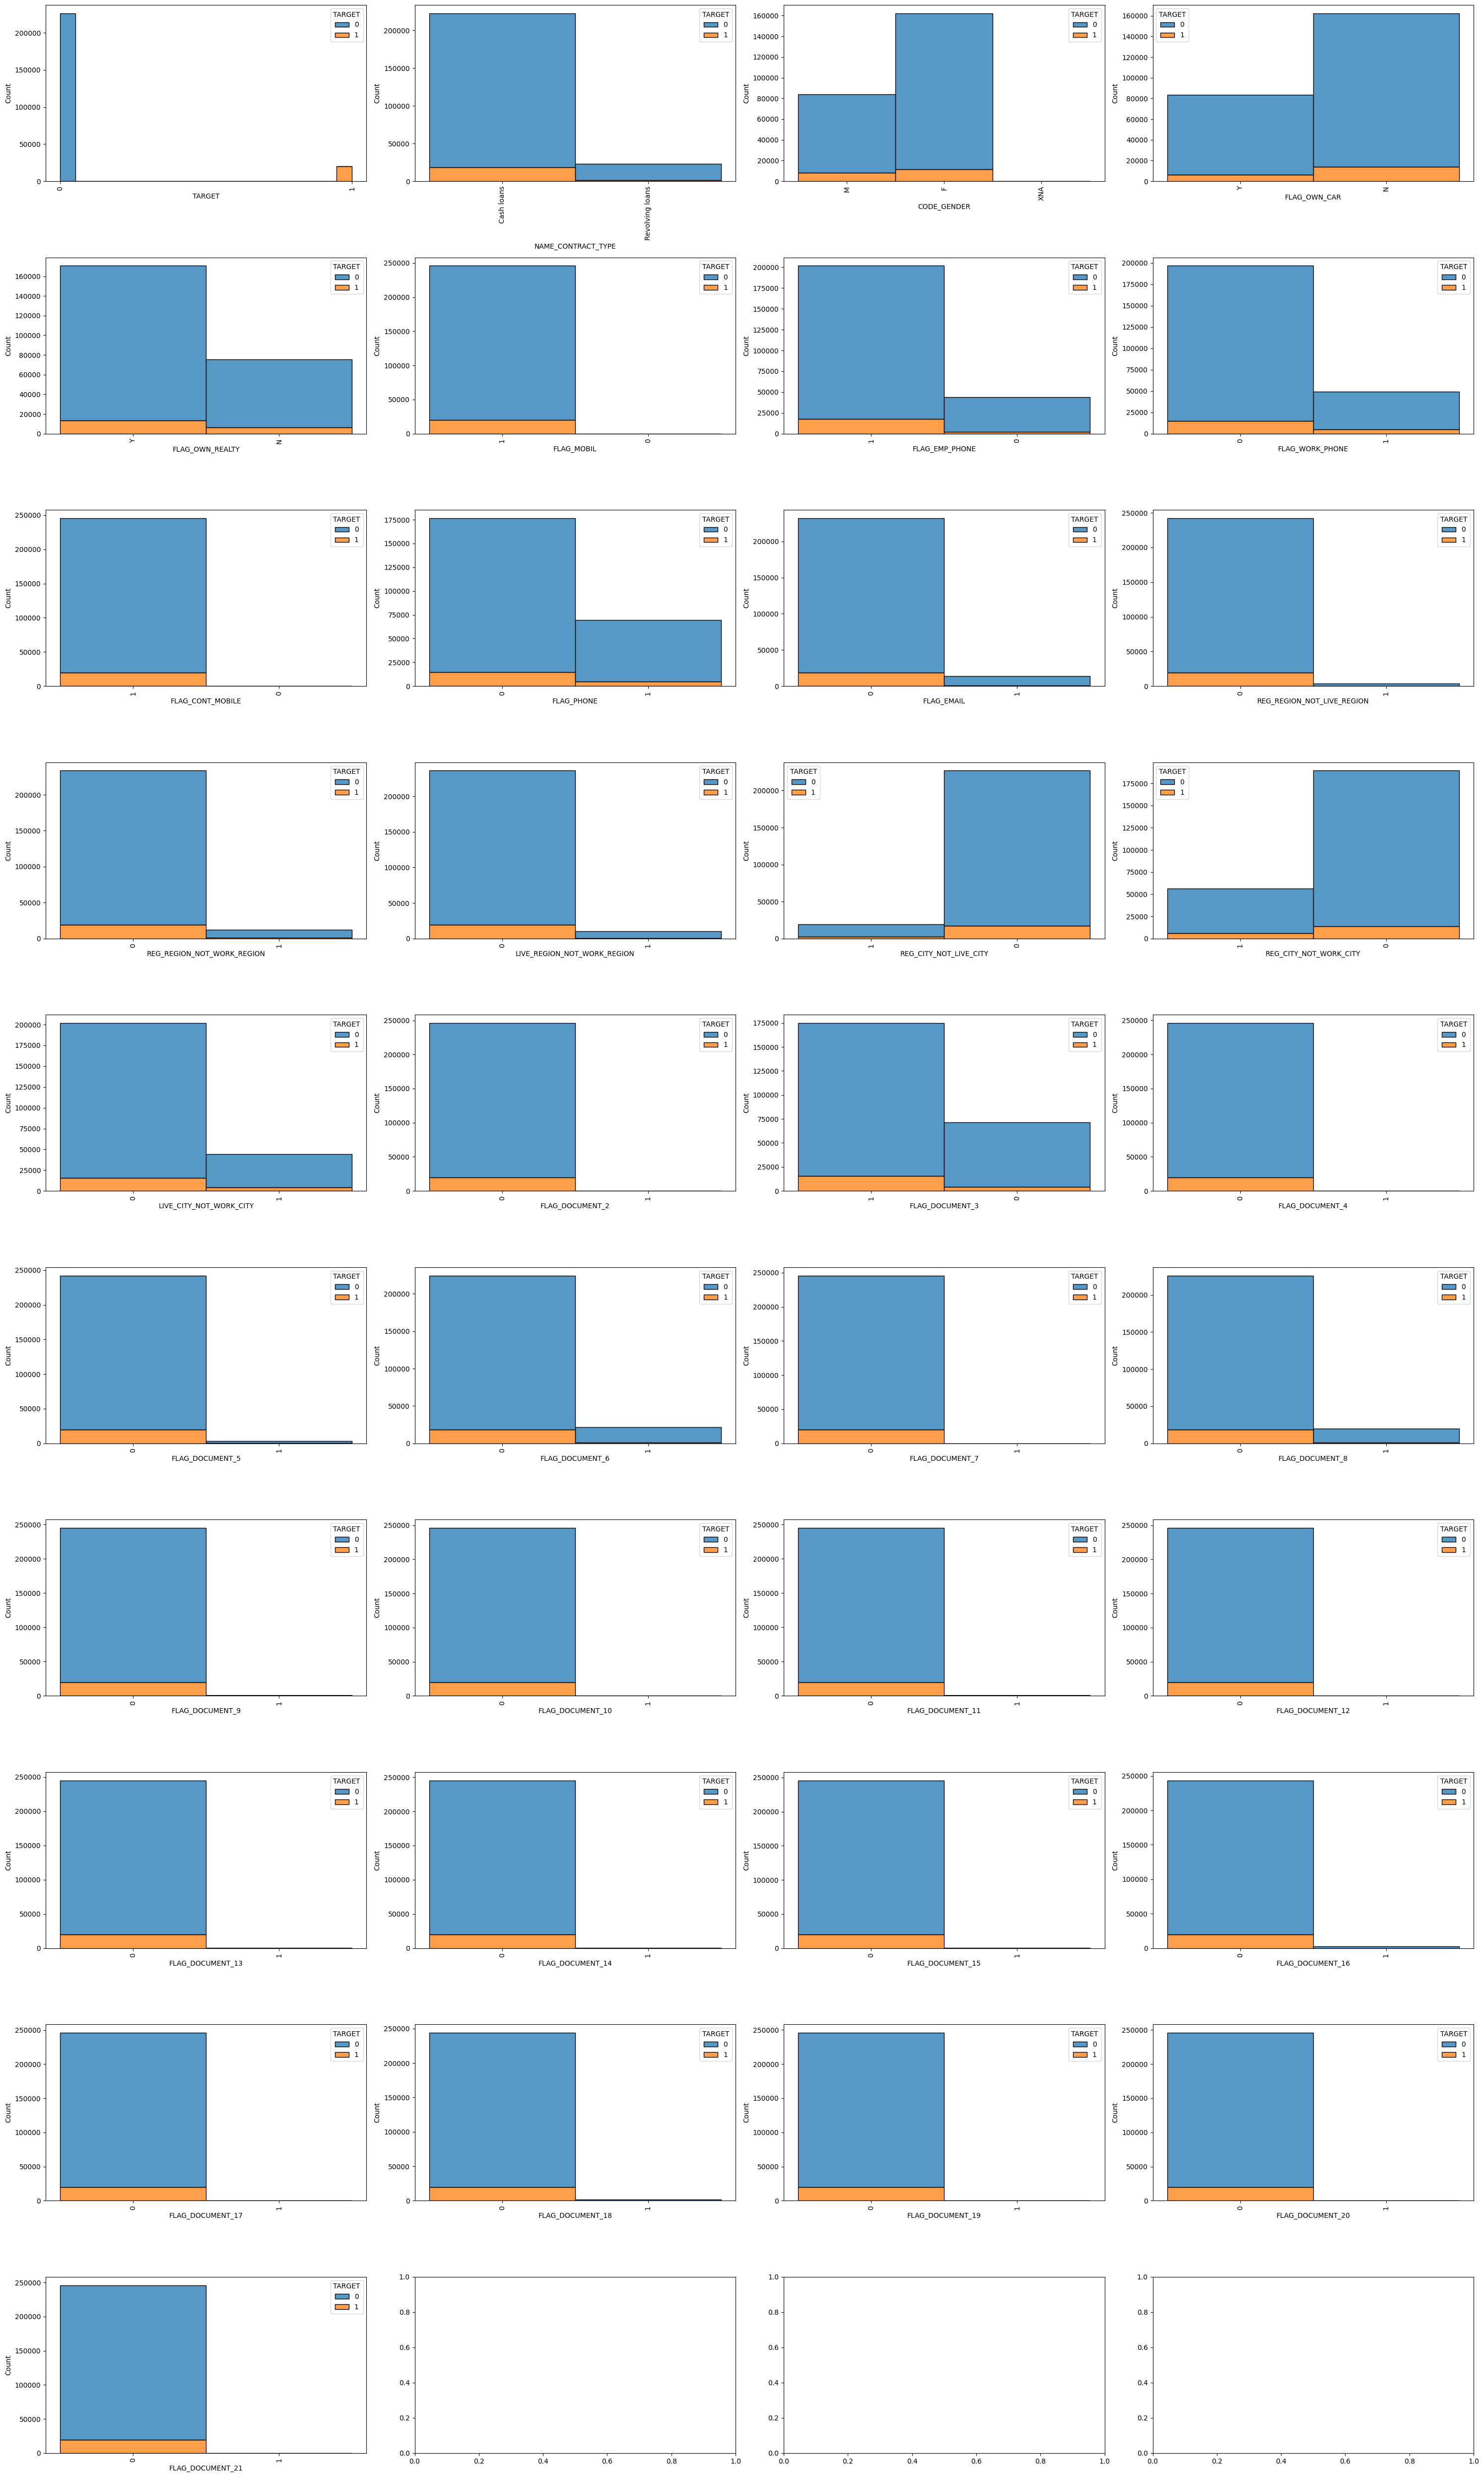

In [25]:
#Análisis gráfico de todas las variables categóricas binarias


fig, axs = plt.subplots(nrows=10, ncols=4, figsize=(30, 50))
axs = axs.flatten()

for i, var in enumerate(binarias):
    sns.histplot(x=var, hue='TARGET', data=df_train, ax=axs[i],
                 kde=False, element="bars", fill=True, multiple="stack")

    # Determina las ubicaciones de los ticks como los índices de las etiquetas únicas
    ubicaciones = range(len(df_train[var].unique()))
    # Asigna las etiquetas únicas del DataFrame a las ubicaciones de los ticks
    axs[i].set_xticks(ubicaciones)  # Aquí se define explícitamente la ubicación de los ticks
    axs[i].set_xticklabels(df_train[var].unique(), rotation=90)  # Asigna las etiquetas con rotación

    axs[i].set_xlabel(var)

fig.tight_layout()
plt.show()


In [26]:
# Se tienen 20 variables denominadas Flag_Document_X, las cuales hacen referencia a si el cliente presentó X documento (1)
#o si no presentó (0).
#Observando la distribución de dichas variables donde en la mayoría se evidencia que no presentaron los documentos, por lo cual
#esta información no aportaría valor, se decide obtener el % de representación de las etiquetas para validar estos datos.

#Se decide mantener solamente la variable FLAG_DOCUMENT_3  que tiene la mayor cantidad de información para documentación entregada.
df_flag_document = df_train.loc[:, df_train.columns.str.contains('DOCUMENT')]

for column in df_flag_document:

    count_0 = df_flag_document[column].value_counts()[0]
    count_1 = df_flag_document[column].value_counts()[1]
    total_rows = df_flag_document.shape[0]

    percent_0 = np.round((count_0*100/total_rows),2)
    percent_1 = np.round(100 - percent_0,2)

    print(column, ": % de 1 = ",percent_1,
    "; % de 0 =", percent_0)

FLAG_DOCUMENT_2 : % de 1 =  0.0 ; % de 0 = 100.0
FLAG_DOCUMENT_3 : % de 1 =  28.94 ; % de 0 = 71.06
FLAG_DOCUMENT_4 : % de 1 =  0.01 ; % de 0 = 99.99
FLAG_DOCUMENT_5 : % de 1 =  1.51 ; % de 0 = 98.49
FLAG_DOCUMENT_6 : % de 1 =  8.79 ; % de 0 = 91.21
FLAG_DOCUMENT_7 : % de 1 =  0.02 ; % de 0 = 99.98
FLAG_DOCUMENT_8 : % de 1 =  8.1 ; % de 0 = 91.9
FLAG_DOCUMENT_9 : % de 1 =  0.38 ; % de 0 = 99.62
FLAG_DOCUMENT_10 : % de 1 =  0.0 ; % de 0 = 100.0
FLAG_DOCUMENT_11 : % de 1 =  0.4 ; % de 0 = 99.6
FLAG_DOCUMENT_12 : % de 1 =  0.0 ; % de 0 = 100.0
FLAG_DOCUMENT_13 : % de 1 =  0.35 ; % de 0 = 99.65
FLAG_DOCUMENT_14 : % de 1 =  0.3 ; % de 0 = 99.7
FLAG_DOCUMENT_15 : % de 1 =  0.12 ; % de 0 = 99.88
FLAG_DOCUMENT_16 : % de 1 =  1.0 ; % de 0 = 99.0
FLAG_DOCUMENT_17 : % de 1 =  0.03 ; % de 0 = 99.97
FLAG_DOCUMENT_18 : % de 1 =  0.82 ; % de 0 = 99.18
FLAG_DOCUMENT_19 : % de 1 =  0.06 ; % de 0 = 99.94
FLAG_DOCUMENT_20 : % de 1 =  0.05 ; % de 0 = 99.95
FLAG_DOCUMENT_21 : % de 1 =  0.03 ; % de 0 = 99.9

In [27]:
#Análisis de var binarias

binarias_starget_sFlags=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE',
'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
'FLAG_DOCUMENT_3']

plt.figure(figsize=(20, 20))


for var in binarias_starget_sFlags:
    result = df_train.groupby([var, 'TARGET']).size().reset_index(name='frecuencia')
    result['%'] = result['frecuencia'] / result.groupby(var)['frecuencia'].transform('sum')

    # Muestra el resultado para cada variable
    print(f"Result for {var}:\n{result}\n")

Result for NAME_CONTRACT_TYPE:
  NAME_CONTRACT_TYPE  TARGET  frecuencia         %
0         Cash loans       0      204031  0.916511
1         Cash loans       1       18586  0.083489
2    Revolving loans       0       22117  0.945535
3    Revolving loans       1        1274  0.054465

Result for CODE_GENDER:
  CODE_GENDER  TARGET  frecuencia         %
0           F       0      150746  0.929504
1           F       1       11433  0.070496
2           M       0       75398  0.899469
3           M       1        8427  0.100531
4         XNA       0           4  1.000000

Result for FLAG_OWN_CAR:
  FLAG_OWN_CAR  TARGET  frecuencia         %
0            N       0      148496  0.915094
1            N       1       13778  0.084906
2            Y       0       77652  0.927365
3            Y       1        6082  0.072635

Result for FLAG_OWN_REALTY:
  FLAG_OWN_REALTY  TARGET  frecuencia         %
0               N       0       69041  0.916405
1               N       1        6298  0.083595
2

<Figure size 2000x2000 with 0 Axes>

**Conclusiones de análisis de var binarias:**

    *La mayoría de las variables denominadas Flag_Document_X mostraban distribuciones muy sesgadas a la derecha, evidenciando una alta cantidad de documentos que no fueron presentados, se decide mantener solamente la variable FLAG_DOCUMENT_3  que tiene la mayor cantidad de información para documentación entregada.
    
    *Las variables: FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, REG_REGION_NOT_LIVE_REGION y LIVE_REGION_NOT_WORK_REGION mostraron que no existe mucha diferencia (de aprox. 1%) entre clientes con dificultades para pagar dentro de ambas etiquetas de cada variables, por lo cual estas características no aportarían valor. Ejemplo:En varibale FLAG_OWN_CAR, la proporción de personas que tienen auto y no pagan es del  7.2% vs el 8.5% de personas que no tienen auto y pagan.
    
    *Se sugeriría agrupar la 3ra categoría de gender.
    
    *Las variables que estan como tipo object deberán ser codificadas con label_encoder y no olvidar evitar el filtrado de información al aplicar este al set de testeo.

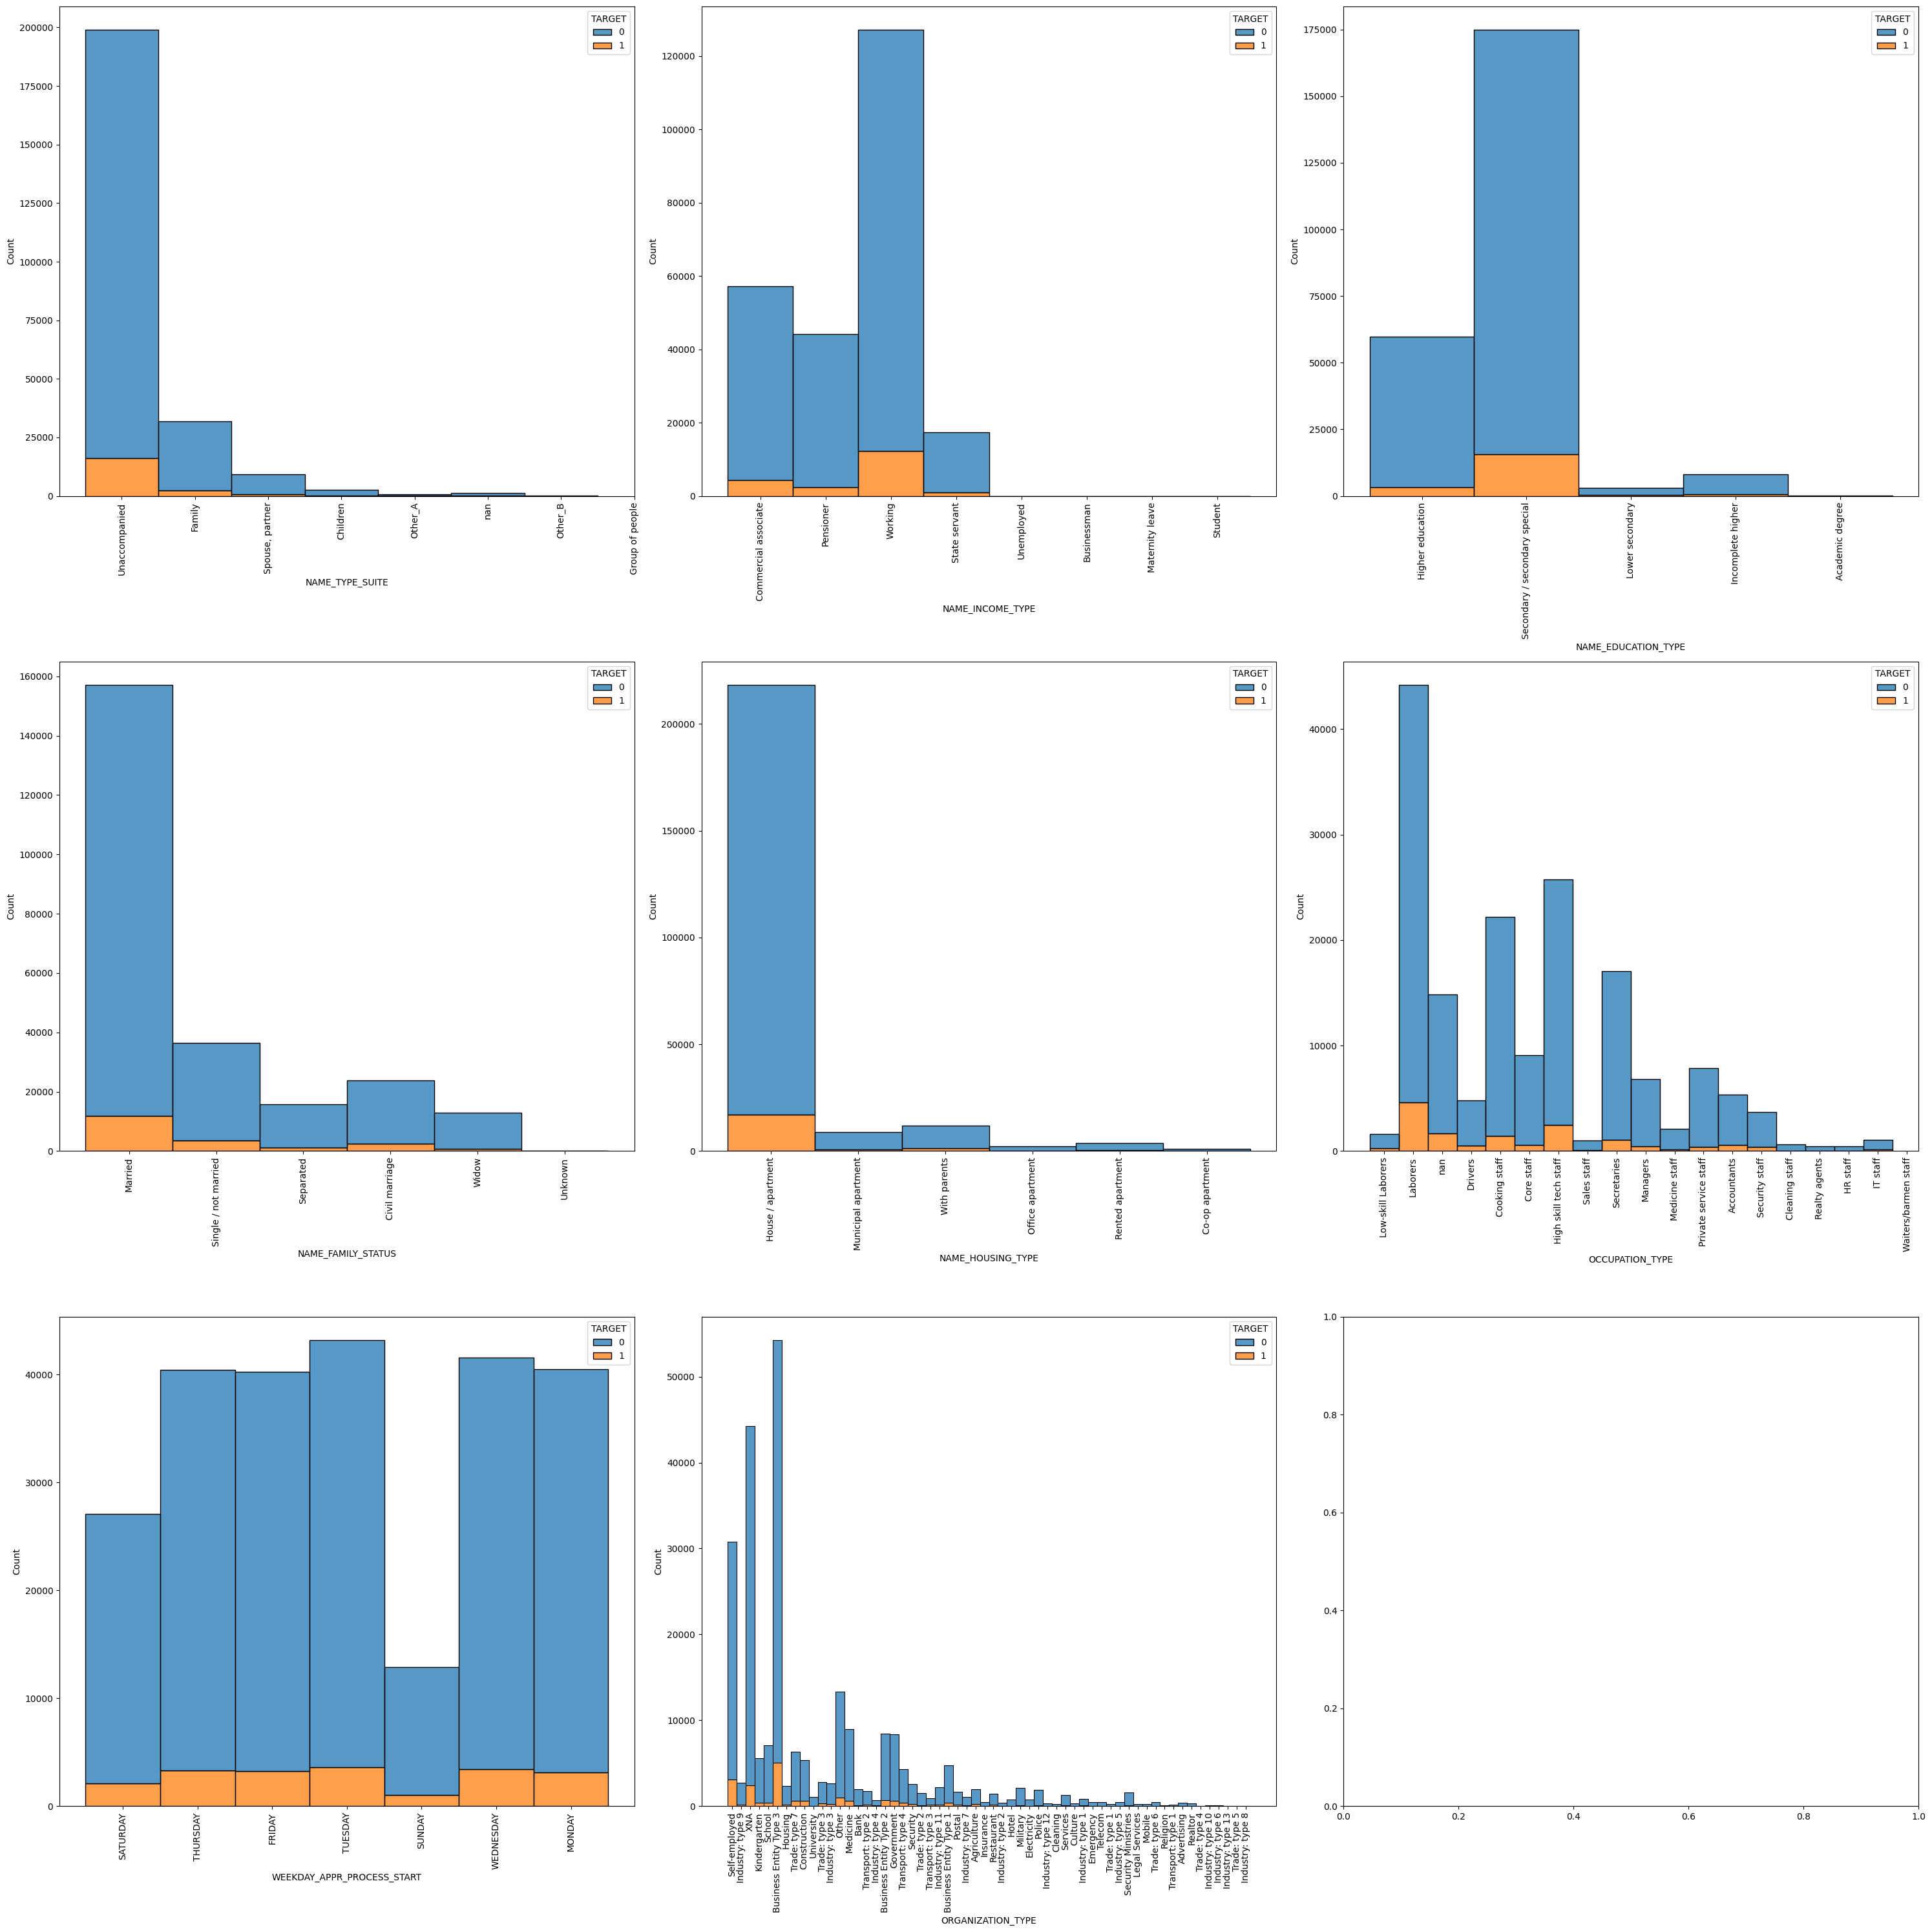

In [28]:
#Análisis gráfico de todas las variables categóricas nominales

cat_nominal_vars_sAge= ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
axs = axs.flatten()

for i, var in enumerate(cat_nominal_vars_sAge):
    sns.histplot(x=var, hue='TARGET', data=df_train, ax=axs[i],
                 kde=False, element="bars", fill=True, multiple="stack")

    # Determina las ubicaciones de los ticks como los índices de las etiquetas únicas
    ubicaciones = range(len(df_train[var].unique()))
    # Asigna las etiquetas únicas del DataFrame a las ubicaciones de los ticks
    axs[i].set_xticks(ubicaciones)  # Aquí se define explícitamente la ubicación de los ticks
    axs[i].set_xticklabels(df_train[var].unique(), rotation=90)

    axs[i].set_xlabel(var)

fig.tight_layout()
plt.show()

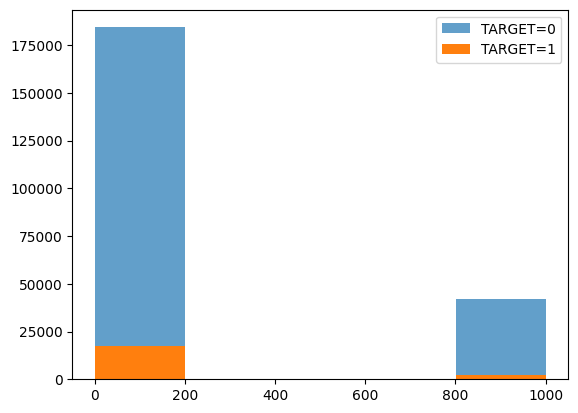

In [29]:
df_train['employed_years'] = (df_train['DAYS_EMPLOYED'] / 365).abs() #se usa valor absoluto para convertir los negativos

df_test['employed_years'] = (df_test['DAYS_EMPLOYED'] / 365).abs()

plt.hist(df_train[df_train['TARGET'] == 0]['employed_years'], bins=5, label='TARGET=0', alpha=0.7)

plt.hist(df_train[df_train['TARGET'] == 1]['employed_years'], bins=5, label='TARGET=1', alpha=1.0)

plt.legend()

plt.show()

In [30]:
num_bins = 10

hist_values, bin_edges = np.histogram(df_train['employed_years'], bins=num_bins)
bin_edges

array([   0.        ,  100.06657534,  200.13315068,  300.19972603,
        400.26630137,  500.33287671,  600.39945205,  700.4660274 ,
        800.53260274,  900.59917808, 1000.66575342])

In [31]:
df_train['employed_years'].describe()

count    246008.000000
mean        185.253968
std         381.791126
min           0.000000
25%           2.553425
50%           6.082192
75%          15.597260
max        1000.665753
Name: employed_years, dtype: float64

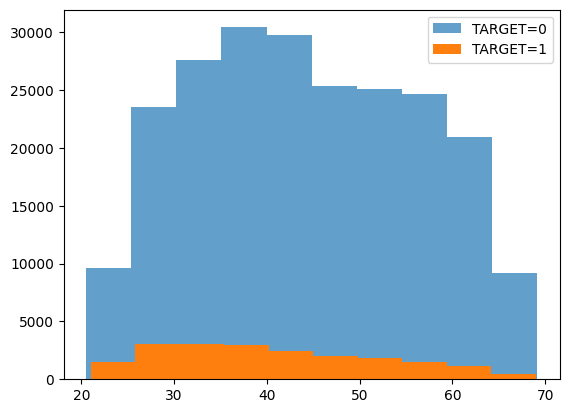

Límites de los bins para TARGET=0: [20.51780822 25.37808219 30.23835616 35.09863014 39.95890411 44.81917808
 49.67945205 54.53972603 59.4        64.26027397 69.12054795]
Límites de los bins para TARGET=1: [21.04109589 25.83232877 30.62356164 35.41479452 40.2060274  44.99726027
 49.78849315 54.57972603 59.3709589  64.16219178 68.95342466]


In [32]:
df_train['age_years'] = (df_train['DAYS_BIRTH'] / 365) * -1
df_test['age_years'] = (df_test['DAYS_BIRTH'] / 365) * -1

hist_0, bin_edges_0, _ =plt.hist(df_train[df_train['TARGET'] == 0]['age_years'], bins=10, label='TARGET=0', alpha=0.7)

hist_1, bin_edges_1, _ =plt.hist(df_train[df_train['TARGET'] == 1]['age_years'], bins=10, label='TARGET=1', alpha=1.0)

plt.legend()
plt.show()


print("Límites de los bins para TARGET=0:", bin_edges_0)
print("Límites de los bins para TARGET=1:", bin_edges_1)

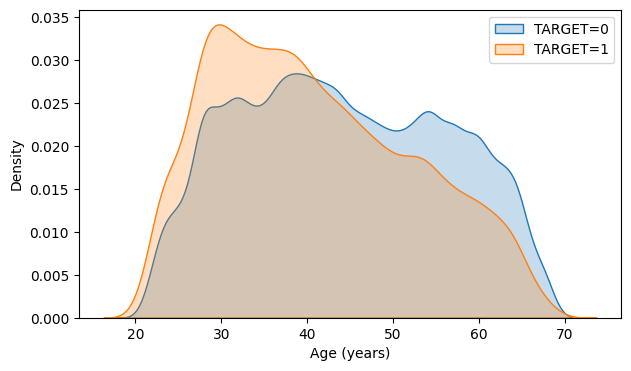

In [33]:
df_train['age_years'] = (df_train['DAYS_BIRTH'] / 365) * -1
df_test['age_years'] = (df_test['DAYS_BIRTH'] / 365) * -1

plt.figure(figsize=(7, 4))
sns.kdeplot(df_train[df_train['TARGET'] == 0]['age_years'], label='TARGET=0', fill=True)
sns.kdeplot(df_train[df_train['TARGET'] == 1]['age_years'], label='TARGET=1', fill=True)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.show()

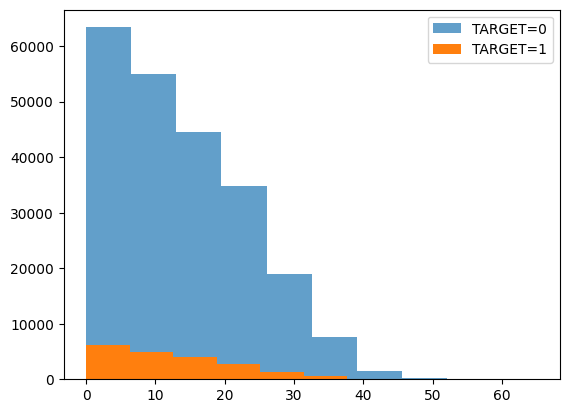

Límites de los bins para TARGET=0: [ 0.          6.50356164 13.00712329 19.51068493 26.01424658 32.51780822
 39.02136986 45.52493151 52.02849315 58.53205479 65.03561644]
Límites de los bins para TARGET=1: [ 0.          6.28164384 12.56328767 18.84493151 25.12657534 31.40821918
 37.68986301 43.97150685 50.25315068 56.53479452 62.81643836]


In [34]:
df_train['regist_years'] = (df_train['DAYS_REGISTRATION'] / 365) * -1
df_test['regist_years'] = (df_test['DAYS_REGISTRATION'] / 365) * -1

hist_0, bin_edges_0, _ =plt.hist(df_train[df_train['TARGET'] == 0]['regist_years'], bins=10, label='TARGET=0', alpha=0.7)

hist_1, bin_edges_1, _ =plt.hist(df_train[df_train['TARGET'] == 1]['regist_years'], bins=10, label='TARGET=1', alpha=1.0)

plt.legend()
plt.show()

print("Límites de los bins para TARGET=0:", bin_edges_0)
print("Límites de los bins para TARGET=1:", bin_edges_1)

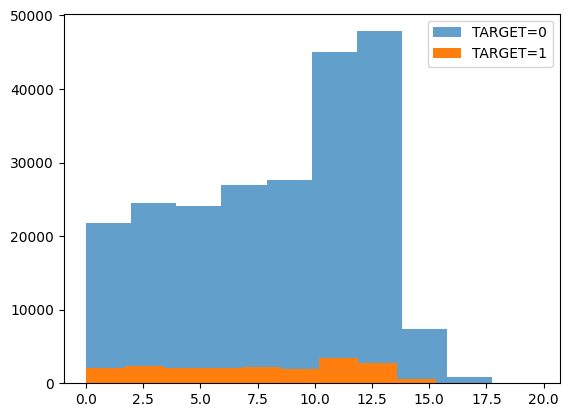

Límites de los bins para TARGET=0: [ 0.          1.97178082  3.94356164  5.91534247  7.88712329  9.85890411
 11.83068493 13.80246575 15.77424658 17.7460274  19.71780822]
Límites de los bins para TARGET=1: [ 0.          1.70054795  3.40109589  5.10164384  6.80219178  8.50273973
 10.20328767 11.90383562 13.60438356 15.30493151 17.00547945]


In [35]:
df_train['publish_years'] = (df_train['DAYS_ID_PUBLISH'] / 365) * -1
df_test['publish_years'] = (df_test['DAYS_ID_PUBLISH'] / 365) * -1

hist_0, bin_edges_0, _ =plt.hist(df_train[df_train['TARGET'] == 0]['publish_years'], bins=10, label='TARGET=0', alpha=0.7)

hist_1, bin_edges_1, _ =plt.hist(df_train[df_train['TARGET'] == 1]['publish_years'], bins=10, label='TARGET=1', alpha=1.0)

plt.legend()
plt.show()

print("Límites de los bins para TARGET=0:", bin_edges_0)
print("Límites de los bins para TARGET=1:", bin_edges_1)


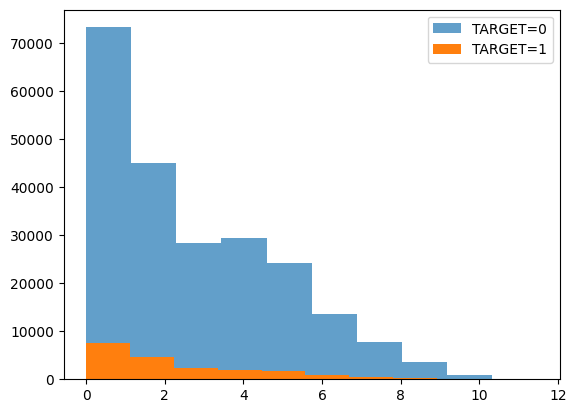

Límites de los bins para TARGET=0: [ 0.          1.14657534  2.29315068  3.43972603  4.58630137  5.73287671
  6.87945205  8.0260274   9.17260274 10.31917808 11.46575342]
Límites de los bins para TARGET=1: [ 0.          1.11506849  2.23013699  3.34520548  4.46027397  5.57534247
  6.69041096  7.80547945  8.92054795 10.03561644 11.15068493]


In [36]:
df_train['phoneChange_years'] = (df_train['DAYS_LAST_PHONE_CHANGE'] / 365) * -1
df_test['phoneChange_years'] = (df_test['DAYS_LAST_PHONE_CHANGE'] / 365) * -1

hist_0, bin_edges_0, _ =plt.hist(df_train[df_train['TARGET'] == 0]['phoneChange_years'], bins=10, label='TARGET=0', alpha=0.7)

hist_1, bin_edges_1, _ =plt.hist(df_train[df_train['TARGET'] == 1]['phoneChange_years'], bins=10, label='TARGET=1', alpha=1.0)

plt.legend()
plt.show()
print("Límites de los bins para TARGET=0:", bin_edges_0)
print("Límites de los bins para TARGET=1:", bin_edges_1)

In [37]:
#Análisis de var cat nominales

plt.figure(figsize=(20, 20))


for var in cat_nominal_vars_sAge:
    result = df_train.groupby([var, 'TARGET']).size().reset_index(name='frecuencia')
    result['%'] = result['frecuencia'] / result.groupby(var)['frecuencia'].transform('sum')

    # Muestra el resultado para cada variable
    print(f"Result for {var}:\n{result}\n")

Result for NAME_TYPE_SUITE:
    NAME_TYPE_SUITE  TARGET  frecuencia         %
0          Children       0        2412  0.925201
1          Children       1         195  0.074799
2            Family       0       29551  0.925175
3            Family       1        2390  0.074825
4   Group of people       0         196  0.907407
5   Group of people       1          20  0.092593
6           Other_A       0         641  0.907932
7           Other_A       1          65  0.092068
8           Other_B       0        1257  0.901075
9           Other_B       1         138  0.098925
10  Spouse, partner       0        8410  0.920131
11  Spouse, partner       1         730  0.079869
12    Unaccompanied       0      182709  0.918237
13    Unaccompanied       1       16269  0.081763

Result for NAME_INCOME_TYPE:
        NAME_INCOME_TYPE  TARGET  frecuencia         %
0            Businessman       0           9  1.000000
1   Commercial associate       0       53018  0.925674
2   Commercial associate   

<Figure size 2000x2000 with 0 Axes>

**Conclusiones de análisis de var cat nominales:**

    *Se sugiere agrupar las variables con muchas categorías y que sean muy pequeñas, ya que estas pueden no tener suficientes datos para que el modelo aprenda patrones significativos. Al agruparlas, también se evita que el modelo se ajuste demasiado, ya que categorías con porcentajes pequeños pueden ser propensas al sobreajuste.
    
    *La variable edad se decide manejarla como una variable categórica nominal, la cual será agrupada en rangos de edades, lo cual ayudará a la interpretabilidad del modelo. Esta variable se volverá positiva y será traducida a años.
    
    Respecto al gráfico de densidad de dicha variable se evidencia que las personas entre 25 y 35 años son las menos propensas a pagar/tienen dificultad en sus pagos. Sin embargo, las personas mayores a 35 y hasta 40 años son las que obtienen mayor cantidad de créditos.
    
     *Se manejan las otras variables de days como var cat nominales, las cuales serán agrupadas.
     
    * Se debe sustituir los outliers de Days_Employed, ya que viendo su distribución tiene una media de 185 años y un máximo de 1000 años, siendo datos incoherentes, pero que pueden agregar valor al modelo, ya que se ve que dichos outliers son mas propensos a pagar. También existen datos negativos y positivos, por lo cual los negativos deberán ser convertidos a positivos.
    
    *WEEKDAY_APPR_PROCESS_START: no existe mucha diferencia (de aprox. 1%) entre clientes con dificultades para pagar dentro de todas las etiquetas de la variable, por lo cual esta característica no aportaría valor.
    
    *Para la imputación de nulos de las siguientes variables se sugiere:
     
     OCCUPATION_TYPE: Crear una nueva categoría de SD (Sin dato), dada la alta cantidad de nulos (31% del total de datos)
     NAME_TYPE_SUITE: Asignar a una categoría agrupada, dado que los nulos no son elevados (0.42% del total de datos)
     
     *Respecto a la transformación de datos también se sugiere crear dummies posterior a la agrupación y limpieza.
    
    

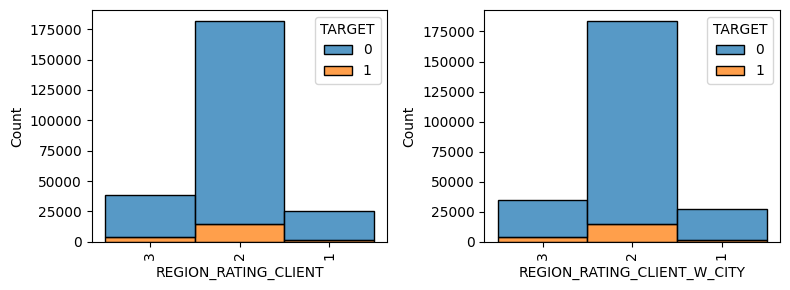

In [38]:
#Análisis gráfico de todas las variables categóricas ordinales

# Gráficos de barras
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs = axs.flatten()

for i, var in enumerate(cat_ordinales):
    sns.histplot(x=var, hue='TARGET', data=df_train, ax=axs[i],
                 kde=False, element="bars", fill=True, multiple="stack")

    # Determina las ubicaciones de los ticks como los índices de las etiquetas únicas
    ubicaciones = range(len(df_train[var].unique()))
    # Asigna las etiquetas únicas del DataFrame a las ubicaciones de los ticks
    axs[i].set_xticks(ubicaciones)  # Aquí se define explícitamente la ubicación de los ticks
    axs[i].set_xticklabels(df_train[var].unique(), rotation=90)

    axs[i].set_xlabel(var)

fig.tight_layout()
plt.show()

In [39]:
#Análisis de var ordinales
plt.figure(figsize=(20, 20))


for var in cat_ordinales:
    result = df_train.groupby([var, 'TARGET']).size().reset_index(name='frecuencia')
    result['%'] = result['frecuencia'] / result.groupby(var)['frecuencia'].transform('sum')

    # Muestra el resultado para cada variable
    print(f"Result for {var}:\n{result}\n")

Result for REGION_RATING_CLIENT:
  REGION_RATING_CLIENT  TARGET  frecuencia         %
0                    1       0       24487  0.951987
1                    1       1        1235  0.048013
2                    2       0      167421  0.921262
3                    2       1       14309  0.078738
4                    3       0       34240  0.888059
5                    3       1        4316  0.111941

Result for REGION_RATING_CLIENT_W_CITY:
  REGION_RATING_CLIENT_W_CITY  TARGET  frecuencia         %
0                           1       0       25986  0.951973
1                           1       1        1311  0.048027
2                           2       0      169152  0.920871
3                           2       1       14535  0.079129
4                           3       0       31010  0.885393
5                           3       1        4014  0.114607



<Figure size 2000x2000 with 0 Axes>

**Conclusiones de análisis de var cat ordinales:**

    *Se deben definir explícitamente como var ordinales antes del modelado.

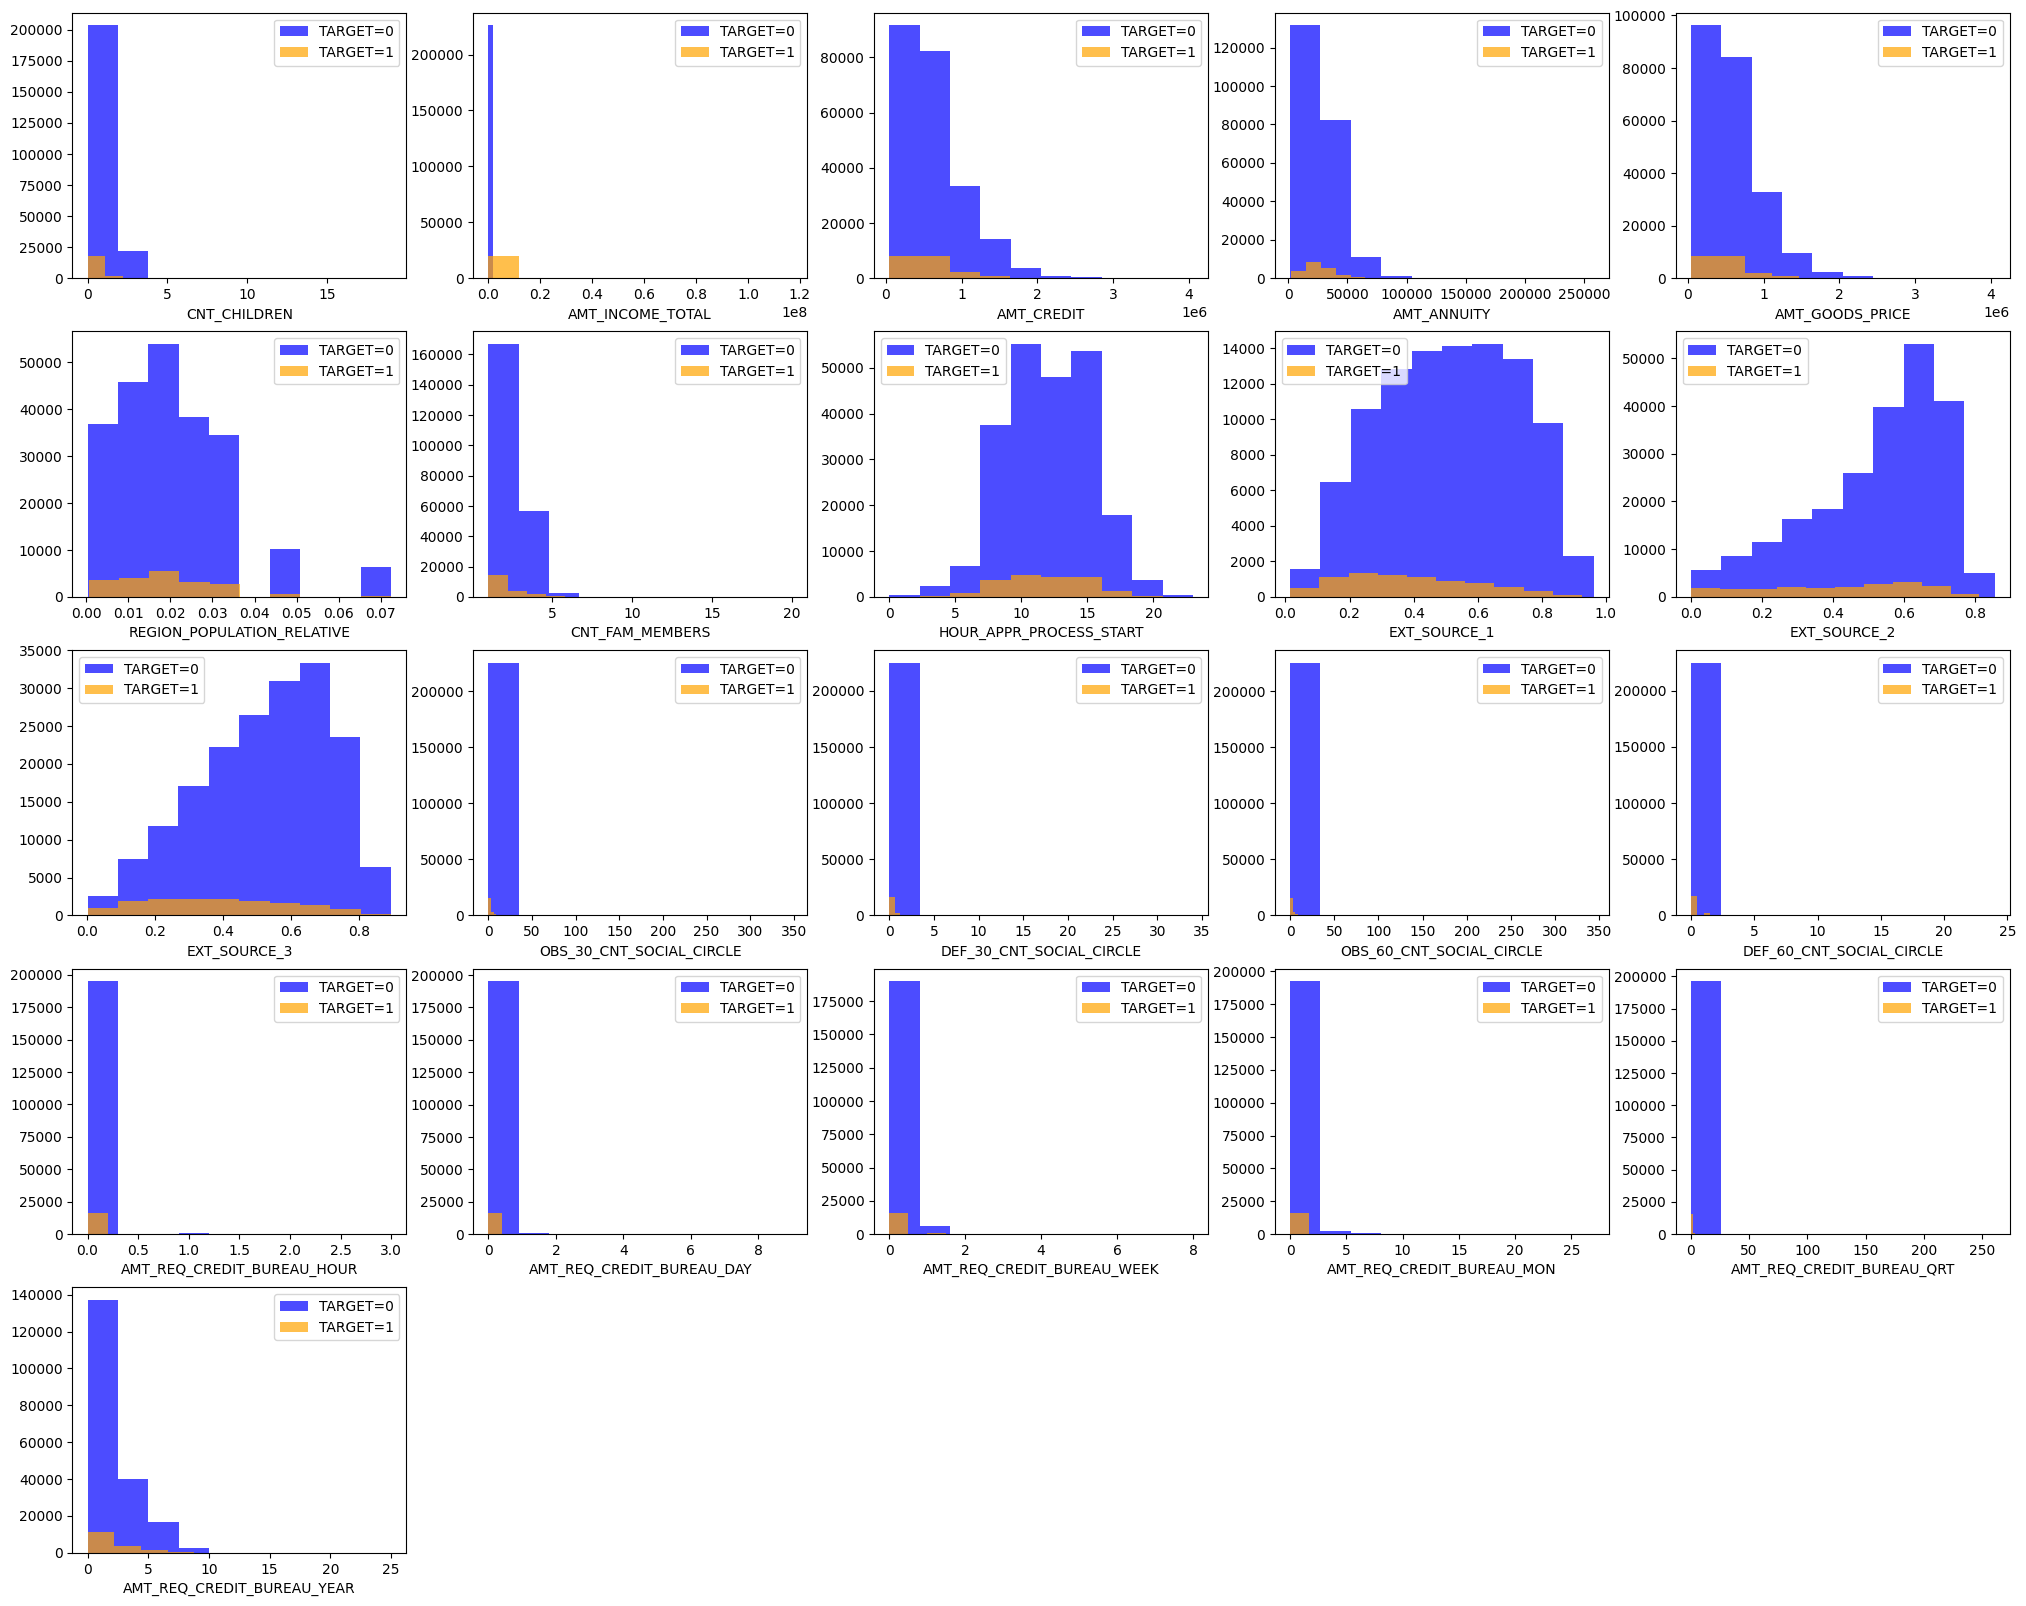

In [40]:
#Análisis gráfico de variables numéricas
color_map = {0: 'blue', 1: 'orange'}
plt.figure(figsize=(25, 20))


for i, var in enumerate(numeric_vars, 1):
    plt.subplot(5, 5, i)
    for target_val, color in color_map.items():
        subset = df_train[df_train['TARGET'] == target_val][var]
        plt.hist(subset, bins=10, alpha=0.7, label=f'TARGET={target_val}', color=color)
    plt.xlabel(var)
    plt.legend()


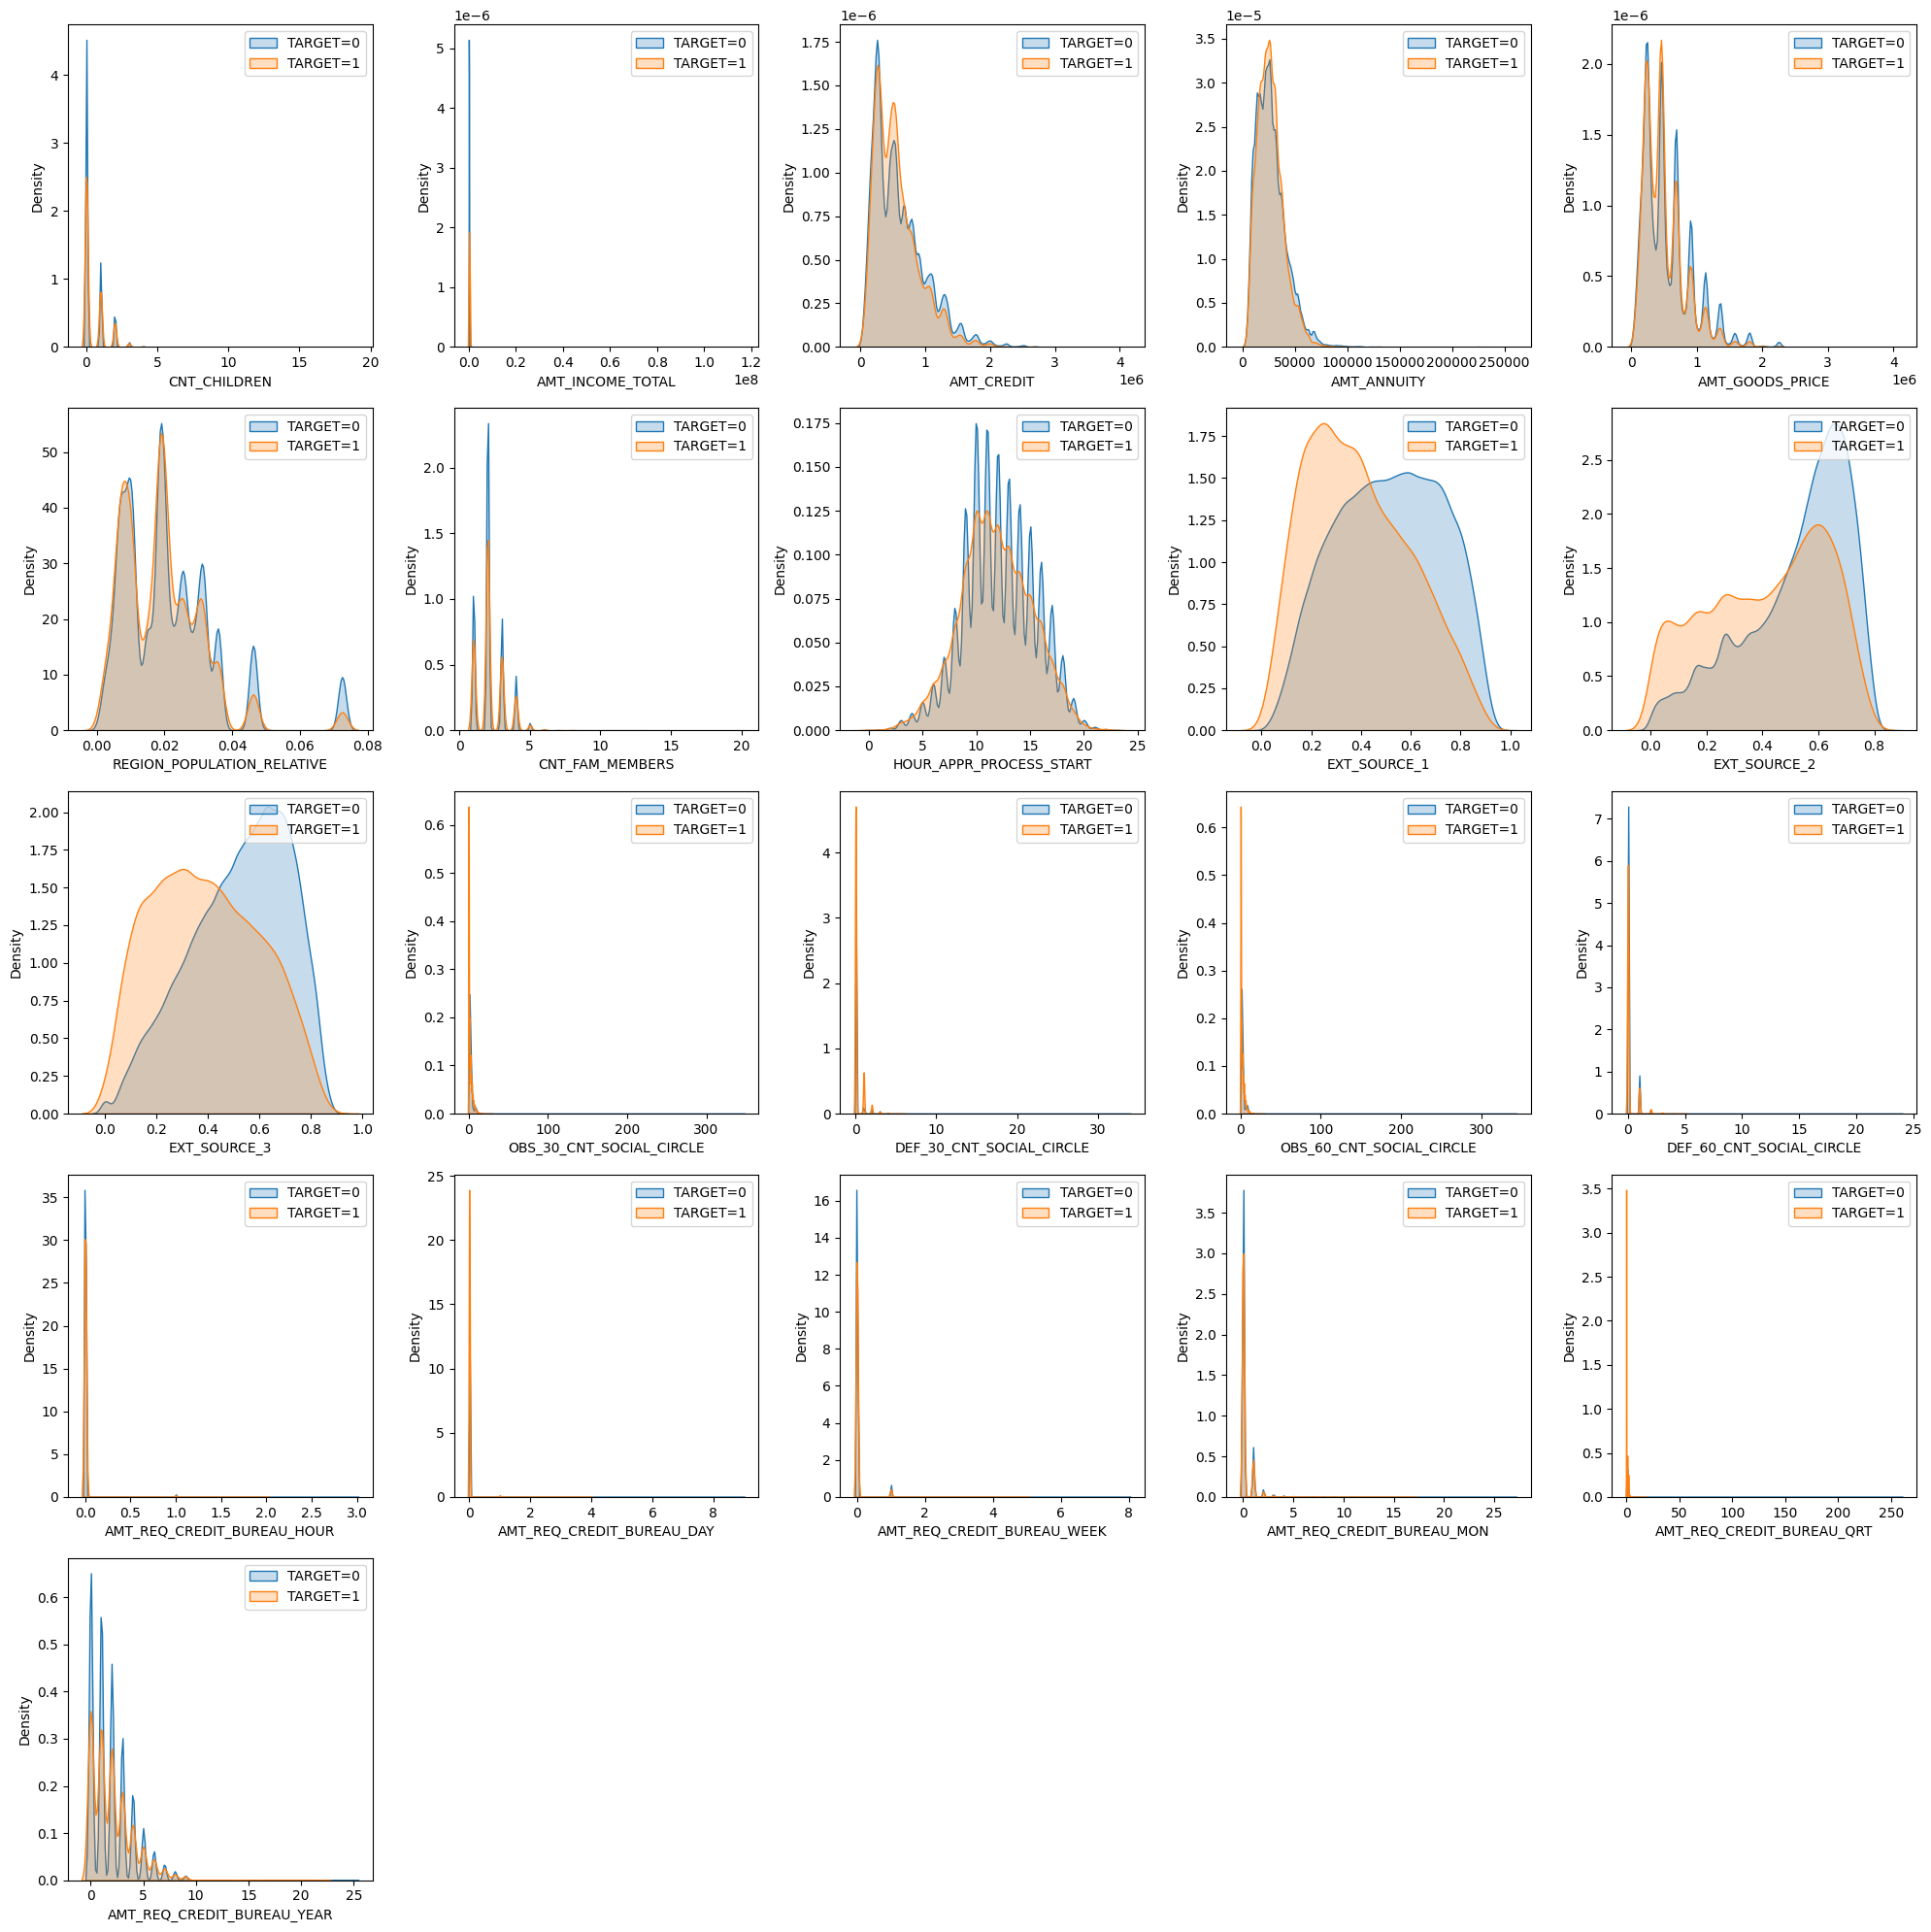

In [41]:
#Análisis gráfico de variables numéricas
plt.figure(figsize=(20, 20))


for i, var in enumerate(numeric_vars, 1):
    plt.subplot(5, 5, i)
    sns.kdeplot(df_train[df_train['TARGET'] == 0][var], label='TARGET=0', fill=True)
    sns.kdeplot(df_train[df_train['TARGET'] == 1][var], label='TARGET=1', fill=True)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

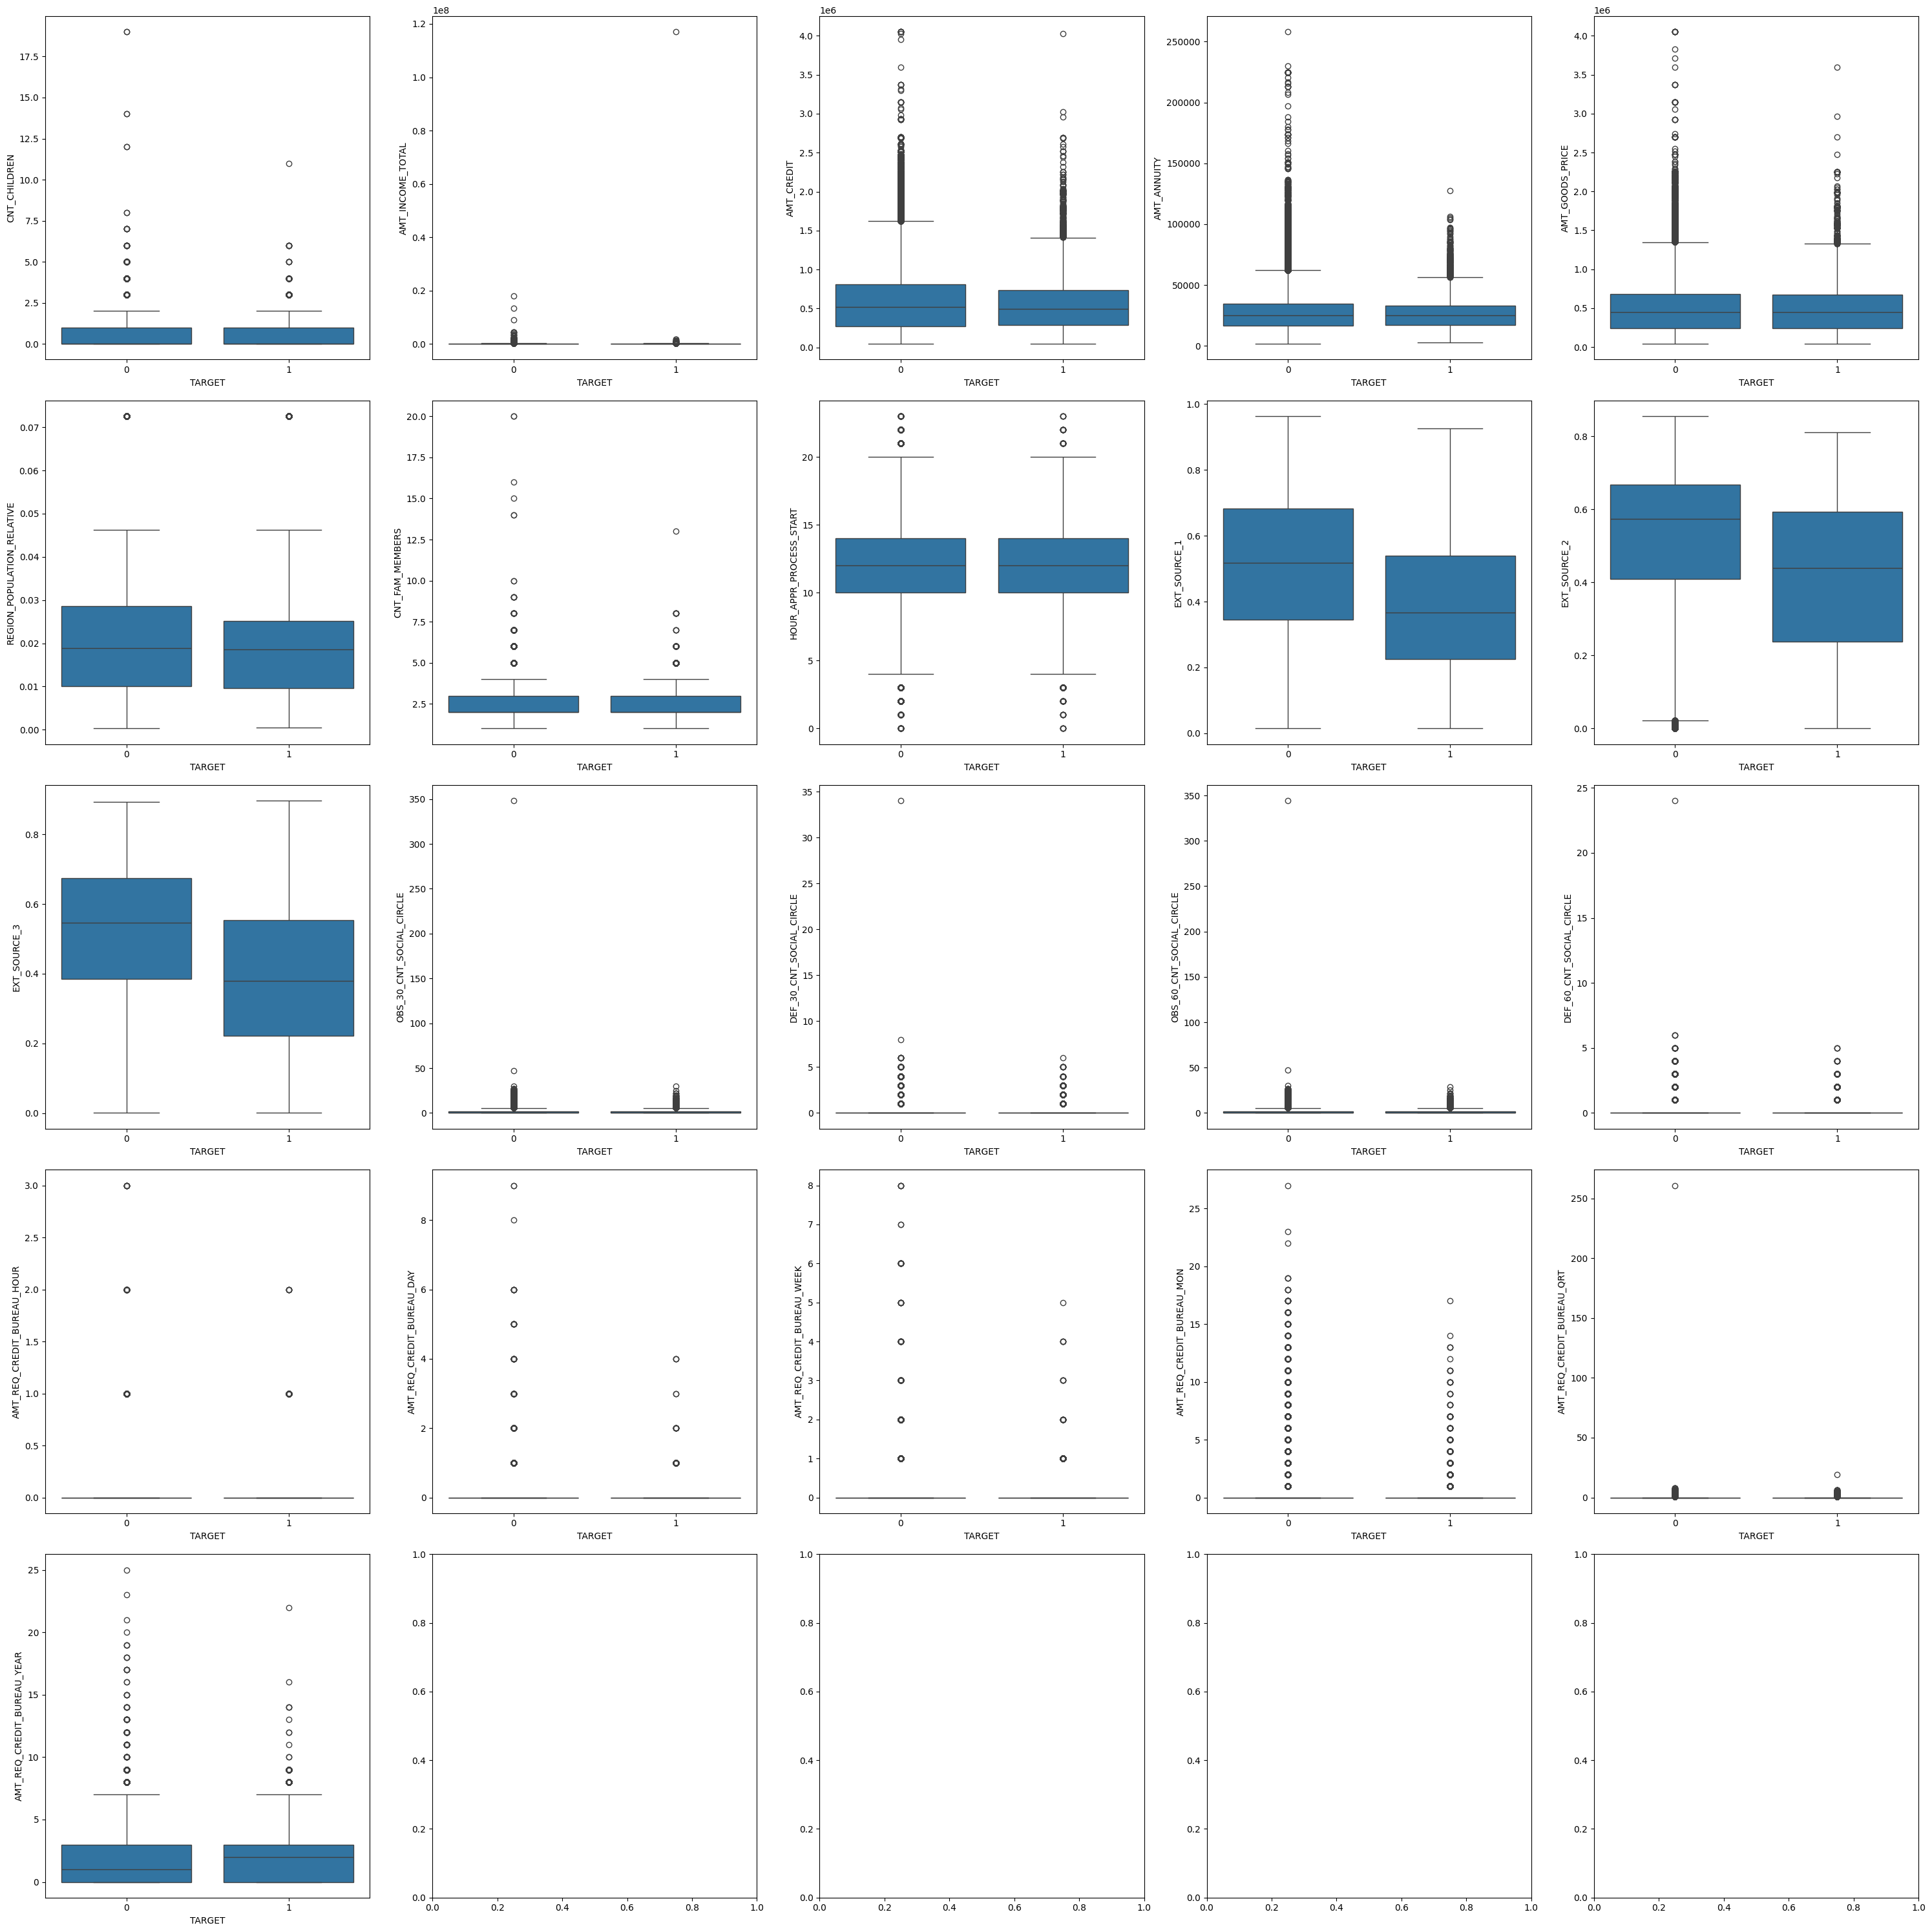

In [42]:
#Análisis gráfico de variables numéricas
# Boxplots

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30))
axs = axs.flatten()

for i, var in enumerate(numeric_vars):
    sns.boxplot(x='TARGET', data=df_train, y=var,ax=axs[i])

fig.tight_layout()

plt.show()


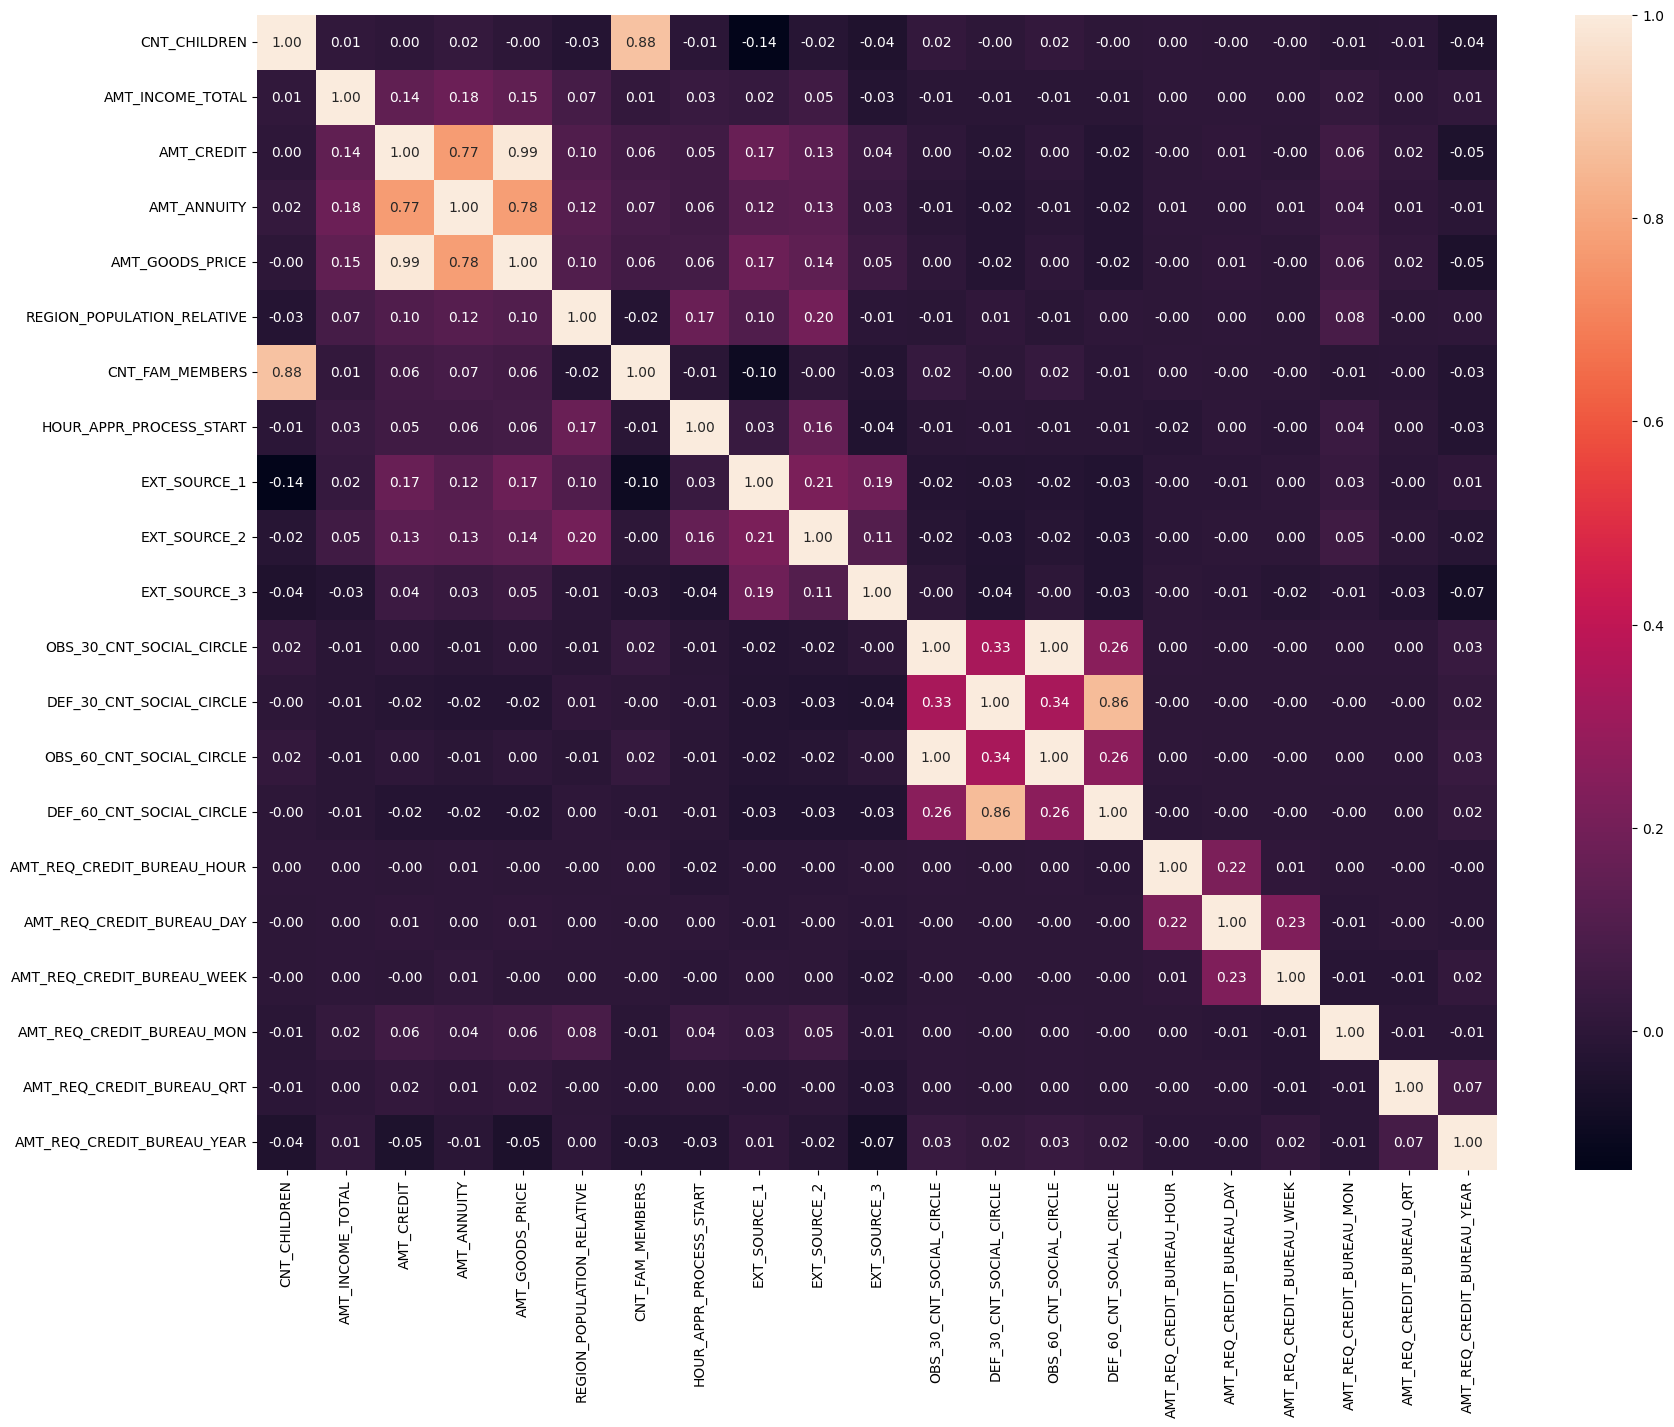

In [43]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_train[numeric_vars].corr(), annot=True, fmt='.2f')
plt.show()

**Conclusiones de análisis de var numéricas:**


    
    *Es importante recordar que la detección y eliminación de outliers no siempre es el mejor curso de acción. En muchos casos, es crucial entender por qué existen esos valores extremos, ya que pueden representar variabilidad real en los datos, errores de medición, o incluso intentos de fraude, dependiendo del contexto. La decisión de eliminar outliers debe basarse en un entendimiento profundo de los datos y los objetivos específicos del análisis
    
    *Las variables deben ser re escaladas, dado que sus escalas son muy variables.
    
    *En base a correlaciones se decide eliminar la variable AMT_GOODS_PRICE ya que tiene una alta correlacion con AMT_CREDIT. También se decide eliminar CNT_CHILDREN por la alta correlacion con FAM_MEMBERS. Por ultimo se decide quitar la var DEF_30_CNT_SOCIAL_CIRCLE por su alta correlacion con DEF_60_CNT_SOCIAL_CIRCLE.
    
    *Respecto a la imputación de valores nulos:
    
    EXT_SOURCE_1 cuenta con una alta cantidad de nulos (56%), sin embargo, se decidió mantener dicha variable debido a que en su gráfico de densidad junto con las otras variables EXT_SOURCE_2 y EXT_SOURCE_3 muestra que las distirbuciones para clientes que pagan vs los que no pagan son muy diferentes, pudiendo aportar mucha información al modelo. Se sugiere ???
    
    

# 1.2. Limpieza y transformación de datos

In [44]:
#Se eliminan las columnas identificadas anteriormente que no aportaran valor a los modelos
df_train= df_train.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION',
'WEEKDAY_APPR_PROCESS_START','AMT_GOODS_PRICE','CNT_CHILDREN','DEF_30_CNT_SOCIAL_CIRCLE'],axis=1)

df_test= df_test.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION',
'WEEKDAY_APPR_PROCESS_START','AMT_GOODS_PRICE','CNT_CHILDREN','DEF_30_CNT_SOCIAL_CIRCLE'],axis=1)

In [45]:
df_train.shape

(246008, 49)

In [46]:
#se vuelve a definir las var numericas sin las columnas que ya fueron eliminadas
numeric_vars= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','EXT_SOURCE_1',
'EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [47]:
#se vuelve a definir las var binarias sin las columnas que ya fueron eliminadas
binarias=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_MOBIL','FLAG_EMP_PHONE',
'FLAG_WORK_PHONE','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
'FLAG_DOCUMENT_3']

In [48]:
#se vuelve a definir las var nominales sin las columnas que ya fueron eliminadas
cat_nominal_vars= ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

# 1.2.1. Limpieza y transf de var binarias

In [49]:
#nulos que quedan en var binarias
df_train[binarias].isna().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
REG_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY        0
REG_CITY_NOT_WORK_CITY        0
LIVE_CITY_NOT_WORK_CITY       0
FLAG_DOCUMENT_3               0
dtype: int64

In [50]:
#Se agrupa la categoría XNA de gender en F,dado que 4 datos tendran menor impacto en la caracteristica que tiene mayor cantidad.
df_train['CODE_GENDER'].replace('XNA','F',inplace=True)

df_test['CODE_GENDER'].replace('XNA','F',inplace=True)

In [51]:
df_train['CODE_GENDER'].value_counts()

F    162183
M     83825
Name: CODE_GENDER, dtype: int64

In [52]:
df_train[binarias].head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3
157774,0,Cash loans,M,1,1,0,0,1,1,0,1
226786,0,Cash loans,M,1,1,0,1,0,1,1,1
59166,0,Cash loans,M,1,0,0,0,0,0,0,1
275596,0,Cash loans,M,1,1,0,0,0,0,0,1
290915,0,Cash loans,F,1,1,1,0,0,0,0,1


In [53]:
df_train[binarias].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246008 entries, 157774 to 86691
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   TARGET                      246008 non-null  int64 
 1   NAME_CONTRACT_TYPE          246008 non-null  object
 2   CODE_GENDER                 246008 non-null  object
 3   FLAG_MOBIL                  246008 non-null  object
 4   FLAG_EMP_PHONE              246008 non-null  object
 5   FLAG_WORK_PHONE             246008 non-null  object
 6   REG_REGION_NOT_WORK_REGION  246008 non-null  object
 7   REG_CITY_NOT_LIVE_CITY      246008 non-null  object
 8   REG_CITY_NOT_WORK_CITY      246008 non-null  object
 9   LIVE_CITY_NOT_WORK_CITY     246008 non-null  object
 10  FLAG_DOCUMENT_3             246008 non-null  object
dtypes: int64(1), object(10)
memory usage: 22.5+ MB


In [54]:
#se convierten a int nuevamente para modelado de datos
df_train['FLAG_MOBIL'] = df_train['FLAG_MOBIL'].astype(int)
df_train['FLAG_EMP_PHONE'] = df_train['FLAG_EMP_PHONE'].astype(int)
df_train['FLAG_WORK_PHONE'] = df_train['FLAG_WORK_PHONE'].astype(int)
df_train['REG_REGION_NOT_WORK_REGION'] = df_train['REG_REGION_NOT_WORK_REGION'].astype(int)
df_train['REG_CITY_NOT_LIVE_CITY'] = df_train['REG_CITY_NOT_LIVE_CITY'].astype(int)
df_train['REG_CITY_NOT_WORK_CITY'] = df_train['REG_CITY_NOT_WORK_CITY'].astype(int)
df_train['LIVE_CITY_NOT_WORK_CITY'] = df_train['LIVE_CITY_NOT_WORK_CITY'].astype(int)
df_train['FLAG_DOCUMENT_3'] = df_train['FLAG_DOCUMENT_3'].astype(int)
df_train['REGION_RATING_CLIENT'] = df_train['REGION_RATING_CLIENT'].astype(int)
df_train['REGION_RATING_CLIENT_W_CITY'] = df_train['REGION_RATING_CLIENT_W_CITY'].astype(int)

In [55]:
#Se codifican las variables categoricas binarias nominales para modelado de datos
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['NAME_CONTRACT_TYPE']= label_encoder.fit_transform(df_train['NAME_CONTRACT_TYPE'])
df_test['NAME_CONTRACT_TYPE']= label_encoder.transform(df_test['NAME_CONTRACT_TYPE'])


In [56]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['CODE_GENDER']= label_encoder.fit_transform(df_train['CODE_GENDER'])
df_test['CODE_GENDER']= label_encoder.transform(df_test['CODE_GENDER'])


In [57]:
df_train[binarias].head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3
157774,0,0,1,1,1,0,0,1,1,0,1
226786,0,0,1,1,1,0,1,0,1,1,1
59166,0,0,1,1,0,0,0,0,0,0,1
275596,0,0,1,1,1,0,0,0,0,0,1
290915,0,0,0,1,1,1,0,0,0,0,1


# 1.2.2. Limpieza y transf de var nominales

In [58]:
#nulos que quedan en var nominales
df_train[cat_nominal_vars].isna().sum()

NAME_TYPE_SUITE            1025
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE           76916
ORGANIZATION_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
DAYS_LAST_PHONE_CHANGE        1
dtype: int64

In [59]:
#se agrupa la var edad concordando con los bins que se evidencian en el gráfico de distribución, pero evitando categorias
#muy pequeñas o parecidas
def create_agegroup(age):
    if (age >= 20) & (age <= 25):
        return '20-25'
    elif (age > 25) & (age <= 30):
        return '25-30'
    elif (age > 30) & (age <= 35):
        return '30-35'
    elif (age > 35) & (age <= 40 ):
        return '35-40'
    elif (age > 40) & (age <= 45 ):
        return '40-45'
    elif (age > 45) & (age <= 55 ):
        return '45-55'
    elif (age > 55) & (age <= 59 ):
        return '55-59'
    elif (age > 59) & (age <= 64 ):
        return '59-64'
    elif (age > 64):
        return '>64'

df_train['age_group']=df_train['age_years'].apply(lambda x:create_agegroup(x))

df_test['age_group']=df_test['age_years'].apply(lambda x:create_agegroup(x))

df_train.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,employed_years,age_years,regist_years,publish_years,phoneChange_years,age_group
157774,282879,0,1,126000.0,852088.5,38632.5,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.008068,-9609,-758,-738.0,-1940,1,1,0,Low-skill Laborers,3.0,3,3,6,0,1,1,0,Self-employed,0.131004,0.055912,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,2.076712,26.326027,2.021918,5.315068,-0.000000,25-30
226786,362689,0,1,166500.0,270000.0,11893.5,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-15172,-378,-566.0,-4125,1,1,0,Laborers,3.0,2,2,13,1,0,1,1,Industry: type 9,0.327692,0.520944,0.312365,0.0,0.0,0.0,-1354.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,1.035616,41.567123,1.550685,11.301370,3.709589,40-45
59166,168578,0,1,202500.0,247275.0,17338.5,Family,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.046220,-23953,365243,-11298.0,-4545,1,0,0,NaN,2.0,1,1,18,0,0,0,0,XNA,NaN,0.099251,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,1000.665753,65.624658,30.953425,12.452055,-0.000000,>64
275596,419375,0,1,315000.0,675000.0,21906.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010500,-16043,-1616,-871.0,-3090,1,1,0,Drivers,1.0,3,3,17,0,0,0,0,Self-employed,NaN,0.164797,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,4.427397,43.953425,2.386301,8.465753,-0.000000,40-45
290915,437015,0,0,90000.0,101880.0,10939.5,Unaccompanied,State servant,Higher education,Married,House / apartment,0.010556,-10369,-2714,-727.0,-3044,1,1,1,Cooking staff,4.0,3,3,10,0,0,0,0,Kindergarten,0.305035,0.292492,0.576209,0.0,0.0,0.0,-1398.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,7.435616,28.408219,1.991781,8.339726,3.830137,25-30


In [60]:
df_train['age_group'].value_counts()

45-55    56052
35-40    34370
40-45    33113
30-35    31506
25-30    26254
59-64    23110
55-59    21247
>64      10643
20-25     9713
Name: age_group, dtype: int64

In [61]:
#los valores atipicos de employed_years (que eran su maximo), se reemplazan por nulos para después imputar  otro valor.
df_train.replace(max(df_train['employed_years'].values), np.nan, inplace=True)

df_test.replace(max(df_test['employed_years'].values), np.nan, inplace=True)

In [62]:
#estadisticos despues de quitar los outliers
df_train['employed_years'].describe()

count    201782.000000
mean          6.534352
std           6.418410
min           0.000000
25%           2.098630
50%           4.512329
75%           8.693151
max          49.073973
Name: employed_years, dtype: float64

In [63]:
#imputar nulos de employed_years con la media, dado que hasta el 3er cuartil es 8 y no seria muy sesgado.
mean_employed_years = df_train['employed_years'].mean()
df_train['employed_years'].fillna(mean_employed_years, inplace=True)

df_test['employed_years'].fillna(mean_employed_years, inplace=True)

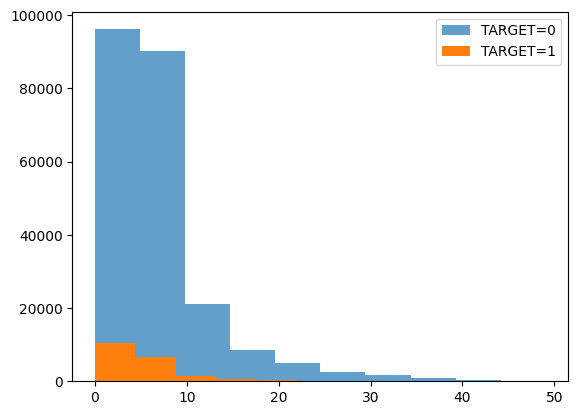

Límites de los bins para TARGET=0: [ 0.          4.90739726  9.81479452 14.72219178 19.62958904 24.5369863
 29.44438356 34.35178082 39.25917808 44.16657534 49.0739726 ]
Límites de los bins para TARGET=1: [1.09589041e-02 4.41232877e+00 8.81369863e+00 1.32150685e+01
 1.76164384e+01 2.20178082e+01 2.64191781e+01 3.08205479e+01
 3.52219178e+01 3.96232877e+01 4.40246575e+01]


In [64]:
#nuevo histograma despues de imputar valores
hist_0, bin_edges_0, _ = plt.hist(df_train[df_train['TARGET'] == 0]['employed_years'], bins=10, label='TARGET=0', alpha=0.7)

hist_1, bin_edges_1, _ =plt.hist(df_train[df_train['TARGET'] == 1]['employed_years'], bins=10, label='TARGET=1', alpha=1.0)

plt.legend()

plt.show()

print("Límites de los bins para TARGET=0:", bin_edges_0)
print("Límites de los bins para TARGET=1:", bin_edges_1)

In [65]:
#agrupar employed_years
def create_employedgroup(regist):
    if (regist >= 0) & (regist <= 5):
        return '0-5'
    elif (regist > 5) & (regist <= 10):
        return '5-10'
    elif (regist > 10) & (regist <= 15 ):
        return '10-15'
    elif (regist > 15):
        return '>15'

df_train['employed_group']=df_train['employed_years'].apply(lambda x:create_employedgroup(x))

df_test['employed_group']=df_test['employed_years'].apply(lambda x:create_employedgroup(x))

df_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,employed_years,age_years,regist_years,publish_years,phoneChange_years,age_group,employed_group
157774,282879,0,1,126000.0,852088.5,38632.5,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.008068,-9609,-758,-738.0,-1940,1,1,0,Low-skill Laborers,3.0,3,3,6,0,1,1,0,Self-employed,0.131004,0.055912,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,2.076712,26.326027,2.021918,5.315068,-0.000000,25-30,0-5
226786,362689,0,1,166500.0,270000.0,11893.5,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-15172,-378,-566.0,-4125,1,1,0,Laborers,3.0,2,2,13,1,0,1,1,Industry: type 9,0.327692,0.520944,0.312365,0.0,0.0,0.0,-1354.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,1.035616,41.567123,1.550685,11.301370,3.709589,40-45,0-5
59166,168578,0,1,202500.0,247275.0,17338.5,Family,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.046220,-23953,365243,-11298.0,-4545,1,0,0,NaN,2.0,1,1,18,0,0,0,0,XNA,NaN,0.099251,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,6.534352,65.624658,30.953425,12.452055,-0.000000,>64,5-10
275596,419375,0,1,315000.0,675000.0,21906.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010500,-16043,-1616,-871.0,-3090,1,1,0,Drivers,1.0,3,3,17,0,0,0,0,Self-employed,NaN,0.164797,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,4.427397,43.953425,2.386301,8.465753,-0.000000,40-45,0-5
290915,437015,0,0,90000.0,101880.0,10939.5,Unaccompanied,State servant,Higher education,Married,House / apartment,0.010556,-10369,-2714,-727.0,-3044,1,1,1,Cooking staff,4.0,3,3,10,0,0,0,0,Kindergarten,0.305035,0.292492,0.576209,0.0,0.0,0.0,-1398.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,7.435616,28.408219,1.991781,8.339726,3.830137,25-30,5-10


In [66]:
df_train['employed_group'].value_counts()

0-5      109096
5-10      96173
10-15     22025
>15       18714
Name: employed_group, dtype: int64

In [67]:
#se agrupa la var regist_years concordando con los bins que se evidencian en el gráfico de distribución, pero evitando categorias
#muy pequeñas o parecidas

def create_registgroup(regist):
    if (regist >= -0) & (regist <= 7):
        return '0-7'
    elif (regist > 7) & (regist <= 13):
        return '7-13'
    elif (regist > 13) & (regist <= 20 ):
        return '13-20'
    elif (regist > 20) & (regist <= 27 ):
        return '20-27'
    elif (regist > 27) & (regist <= 33 ):
        return '27-33'
    elif (regist > 33):
        return '>33'

df_train['regist_group']=df_train['regist_years'].apply(lambda x:create_registgroup(x))
df_test['regist_group']=df_test['regist_years'].apply(lambda x:create_registgroup(x))

df_train.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,employed_years,age_years,regist_years,publish_years,phoneChange_years,age_group,employed_group,regist_group
157774,282879,0,1,126000.0,852088.5,38632.5,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.008068,-9609,-758,-738.0,-1940,1,1,0,Low-skill Laborers,3.0,3,3,6,0,1,1,0,Self-employed,0.131004,0.055912,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,2.076712,26.326027,2.021918,5.315068,-0.000000,25-30,0-5,0-7
226786,362689,0,1,166500.0,270000.0,11893.5,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-15172,-378,-566.0,-4125,1,1,0,Laborers,3.0,2,2,13,1,0,1,1,Industry: type 9,0.327692,0.520944,0.312365,0.0,0.0,0.0,-1354.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,1.035616,41.567123,1.550685,11.301370,3.709589,40-45,0-5,0-7
59166,168578,0,1,202500.0,247275.0,17338.5,Family,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.046220,-23953,365243,-11298.0,-4545,1,0,0,NaN,2.0,1,1,18,0,0,0,0,XNA,NaN,0.099251,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,6.534352,65.624658,30.953425,12.452055,-0.000000,>64,5-10,27-33
275596,419375,0,1,315000.0,675000.0,21906.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010500,-16043,-1616,-871.0,-3090,1,1,0,Drivers,1.0,3,3,17,0,0,0,0,Self-employed,NaN,0.164797,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,4.427397,43.953425,2.386301,8.465753,-0.000000,40-45,0-5,0-7
290915,437015,0,0,90000.0,101880.0,10939.5,Unaccompanied,State servant,Higher education,Married,House / apartment,0.010556,-10369,-2714,-727.0,-3044,1,1,1,Cooking staff,4.0,3,3,10,0,0,0,0,Kindergarten,0.305035,0.292492,0.576209,0.0,0.0,0.0,-1398.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,7.435616,28.408219,1.991781,8.339726,3.830137,25-30,5-10,0-7


In [68]:
df_train['regist_group'].value_counts()

0-7      74137
7-13     55747
13-20    51731
20-27    38903
27-33    16435
>33       9055
Name: regist_group, dtype: int64

In [69]:
#se agrupa la var publish_years concordando con los bins que se evidencian en el gráfico de distribución, pero evitando categorias
#muy pequeñas o parecidas

def create_publishgroup(pub):
    if (pub >= 0) & (pub <= 2):
        return '0-2'
    elif (pub > 2) & (pub <= 6):
        return '2-6'
    elif (pub > 6) & (pub <= 10 ):
        return '6-10'
    elif (pub > 10) & (pub <= 12 ):
        return '10-12'
    elif (pub > 12) & (pub <= 14 ):
        return '12-14'
    elif (pub > 14):
        return '>14'

df_train['publish_group']=df_train['publish_years'].apply(lambda x:create_publishgroup(x))
df_test['publish_group']=df_test['publish_years'].apply(lambda x:create_publishgroup(x))

df_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,employed_years,age_years,regist_years,publish_years,phoneChange_years,age_group,employed_group,regist_group,publish_group
157774,282879,0,1,126000.0,852088.5,38632.5,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.008068,-9609,-758,-738.0,-1940,1,1,0,Low-skill Laborers,3.0,3,3,6,0,1,1,0,Self-employed,0.131004,0.055912,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,2.076712,26.326027,2.021918,5.315068,-0.000000,25-30,0-5,0-7,2-6
226786,362689,0,1,166500.0,270000.0,11893.5,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-15172,-378,-566.0,-4125,1,1,0,Laborers,3.0,2,2,13,1,0,1,1,Industry: type 9,0.327692,0.520944,0.312365,0.0,0.0,0.0,-1354.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,1.035616,41.567123,1.550685,11.301370,3.709589,40-45,0-5,0-7,10-12
59166,168578,0,1,202500.0,247275.0,17338.5,Family,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.046220,-23953,365243,-11298.0,-4545,1,0,0,NaN,2.0,1,1,18,0,0,0,0,XNA,NaN,0.099251,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,6.534352,65.624658,30.953425,12.452055,-0.000000,>64,5-10,27-33,12-14
275596,419375,0,1,315000.0,675000.0,21906.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010500,-16043,-1616,-871.0,-3090,1,1,0,Drivers,1.0,3,3,17,0,0,0,0,Self-employed,NaN,0.164797,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,4.427397,43.953425,2.386301,8.465753,-0.000000,40-45,0-5,0-7,6-10
290915,437015,0,0,90000.0,101880.0,10939.5,Unaccompanied,State servant,Higher education,Married,House / apartment,0.010556,-10369,-2714,-727.0,-3044,1,1,1,Cooking staff,4.0,3,3,10,0,0,0,0,Kindergarten,0.305035,0.292492,0.576209,0.0,0.0,0.0,-1398.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,7.435616,28.408219,1.991781,8.339726,3.830137,25-30,5-10,0-7,6-10


In [70]:
df_train['publish_group'].value_counts()

6-10     60371
2-6      54510
10-12    52536
12-14    47231
0-2      24653
>14       6707
Name: publish_group, dtype: int64

In [71]:
#reemplaza 1 nulo de phoneChange_years con media
df_train['phoneChange_years'] = df_train['phoneChange_years'].fillna(df_train['phoneChange_years'].mean())
df_test['phoneChange_years'] = df_test['phoneChange_years'].fillna(df_train['phoneChange_years'].mean())

In [72]:

#se agrupa la var phoneChange_years concordando con los bins que se evidencian en el gráfico de distribución, pero evitando categorias
#muy pequeñas o parecidas

def create_Pchangegroup(pc):
    if (pc >= -0) & (pc <= 1):
        return '0-1'
    elif (pc > 1) & (pc <= 2):
        return '1-2'
    elif (pc > 2) & (pc <= 4):
        return '2-4'
    elif (pc > 4) & (pc <= 5 ):
        return '4-5'
    elif (pc > 5) & (pc <= 6 ):
        return '5-6'
    elif (pc > 6):
        return '>6'

df_train['pChange_group']=df_train['phoneChange_years'].apply(lambda x:create_Pchangegroup(x))

df_test['pChange_group']=df_test['phoneChange_years'].apply(lambda x:create_Pchangegroup(x))

df_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,employed_years,age_years,regist_years,publish_years,phoneChange_years,age_group,employed_group,regist_group,publish_group,pChange_group
157774,282879,0,1,126000.0,852088.5,38632.5,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.008068,-9609,-758,-738.0,-1940,1,1,0,Low-skill Laborers,3.0,3,3,6,0,1,1,0,Self-employed,0.131004,0.055912,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,2.076712,26.326027,2.021918,5.315068,-0.000000,25-30,0-5,0-7,2-6,0-1
226786,362689,0,1,166500.0,270000.0,11893.5,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-15172,-378,-566.0,-4125,1,1,0,Laborers,3.0,2,2,13,1,0,1,1,Industry: type 9,0.327692,0.520944,0.312365,0.0,0.0,0.0,-1354.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,1.035616,41.567123,1.550685,11.301370,3.709589,40-45,0-5,0-7,10-12,2-4
59166,168578,0,1,202500.0,247275.0,17338.5,Family,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.046220,-23953,365243,-11298.0,-4545,1,0,0,NaN,2.0,1,1,18,0,0,0,0,XNA,NaN,0.099251,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,6.534352,65.624658,30.953425,12.452055,-0.000000,>64,5-10,27-33,12-14,0-1
275596,419375,0,1,315000.0,675000.0,21906.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010500,-16043,-1616,-871.0,-3090,1,1,0,Drivers,1.0,3,3,17,0,0,0,0,Self-employed,NaN,0.164797,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,4.427397,43.953425,2.386301,8.465753,-0.000000,40-45,0-5,0-7,6-10,0-1
290915,437015,0,0,90000.0,101880.0,10939.5,Unaccompanied,State servant,Higher education,Married,House / apartment,0.010556,-10369,-2714,-727.0,-3044,1,1,1,Cooking staff,4.0,3,3,10,0,0,0,0,Kindergarten,0.305035,0.292492,0.576209,0.0,0.0,0.0,-1398.0,1,0.0,0.0,0.0,0.0,0.0,3.0,0,7.435616,28.408219,1.991781,8.339726,3.830137,25-30,5-10,0-7,6-10,2-4


In [73]:
df_train['pChange_group'].value_counts()

0-1    74069
2-4    54239
1-2    46026
4-5    30473
>6     23584
5-6    17617
Name: pChange_group, dtype: int64

In [74]:
df_train['NAME_TYPE_SUITE'].fillna('SD', inplace=True)

df_test['NAME_TYPE_SUITE'].fillna('SD', inplace=True)

In [75]:
# asignar los nulos de NAME_TYPE_SUITE a accompanied, dado que los nulos son pocos (0.42% del total de datos).
#la categoria accompanied es la agrupación de todas las categorías que no son  unacompanied, debido a que estas son muy pequeñas.
replacement_dict = {
    'Family': 'Accompanied',
    'Spouse, partner': 'Accompanied',
    'Children': 'Accompanied',
    'Other_B':'Accompanied',
    'Group of people':'Accompanied',
    'Other_A':'Accompanied'
}

df_train['NAME_TYPE_SUITE'].replace(replacement_dict, inplace=True)
df_test['NAME_TYPE_SUITE'].replace(replacement_dict, inplace=True)

In [76]:
df_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied    198978
Accompanied       46005
SD                 1025
Name: NAME_TYPE_SUITE, dtype: int64

In [77]:
#Agrupación de organization type
replacement_dict = {
    'Business Entity Type 3': 'Business',
    'Business Entity Type 2': 'Business',
    'Business Entity Type 1': 'Business',
    'Industry: type 1':'Industry',
    'Industry: type 2':'Industry',
    'Industry: type 3':'Industry',
    'Industry: type 4':'Industry',
    'Industry: type 5':'Industry',
    'Industry: type 6':'Industry',
    'Industry: type 7':'Industry',
    'Industry: type 8':'Industry',
    'Industry: type 9':'Industry',
    'Industry: type 10':'Industry',
    'Industry: type 11':'Industry',
    'Industry: type 12':'Industry',
    'Industry: type 13':'Industry',
    'Trade: type 1':'Trade',
    'Trade: type 2':'Trade',
    'Trade: type 3':'Trade',
    'Trade: type 4':'Trade',
    'Trade: type 5':'Trade',
    'Trade: type 6':'Trade',
    'Trade: type 7':'Trade',
    'Transport: type 1':'Transport',
    'Transport: type 2':'Transport',
    'Transport: type 3':'Transport',
    'Transport: type 4':'Transport',
    'Kindergarten':'Education',
    'School':'Education',
    'University':'Education'
}

df_train['ORGANIZATION_TYPE'].replace(replacement_dict, inplace=True)
df_test['ORGANIZATION_TYPE'].replace(replacement_dict, inplace=True)

In [78]:
replacement_dict = {
    'Business': 'Business&Employment',
    'Self-employed':'Business&Employment',
    'Trade':'Business&Employment',
    'Industry':'Business&Employment',
    'Medicine':'Business&Employment',
    'Construction':'Business&Employment',
    'Transport':'Business&Employment',
    'Agriculture':'Business&Employment',
    'Bank':'Business&Employment',
    'Insurance':'Business&Employment',
    'Realtor':'Business&Employment',
    'Cleaning':'Business&Employment',
    'Education':'Education&PublicServ',
    'Government':'Education&PublicServ',
    'Military':'Education&PublicServ',
    'Police':'Education&PublicServ',
    'Postal':'Education&PublicServ',
    'Security Ministries':'Education&PublicServ',
    'Security':'Education&PublicServ',
    'Emergency':'Education&PublicServ',
    'Legal Services':'Education&PublicServ',
    'Housing':'Tourism',
    'Hotel':'Tourism',
    'Restaurant':'Tourism',
    'Services':'Tourism',
    'Culture':'Tourism',
    'Electricity':'Telecom',
    'Advertising':'Telecom',
    'Mobile':'Telecom',
    'Religion':'Other'}
df_train['ORGANIZATION_TYPE'].replace(replacement_dict, inplace=True)
df_test['ORGANIZATION_TYPE'].replace(replacement_dict, inplace=True)

In [79]:
df_train['ORGANIZATION_TYPE'].value_counts()

Business&Employment     147839
XNA                      44226
Education&PublicServ     32586
Other                    13393
Tourism                   6128
Telecom                   1836
Name: ORGANIZATION_TYPE, dtype: int64

In [80]:
#se elimina OCCUPATION_TYPE por que ya se tiene la var ORGANIZATION_TYPE que habla tambien sobre la organizacion donde trabaja cliente
df_train= df_train.drop(['OCCUPATION_TYPE'],axis=1)
df_test= df_test.drop(['OCCUPATION_TYPE'],axis=1)

In [81]:
#se vuelve a definir las var nominales sin las columnas que ya fueron eliminadas y con columnas agrupadas nuevas
cat_nominal_vars= ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','age_group','employed_group','regist_group',
'publish_group','pChange_group']

In [82]:
#crear dummies
df_train = pd.get_dummies(df_train, columns = cat_nominal_vars, drop_first = True)
df_test = pd.get_dummies(df_test, columns = cat_nominal_vars, drop_first = True)

In [83]:
missing_cols = set(df_train.columns) - set(df_test.columns)

for col in missing_cols:
    df_test[col] = 0

df_test = df_test[df_train.columns]

# 1.2.3. Limpieza y transf de var ordinales

In [84]:
#nulos que quedan en var ordinales
df_train[cat_ordinales].isna().sum()

REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
dtype: int64

In [85]:
# #las var ordinales se definen explicitamente con ordinales con OrdinalEncoder
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()

# df_train['REGION_RATING_CLIENT'] = ordinal_encoder.fit_transform(df_train[['REGION_RATING_CLIENT']])
# df_test['REGION_RATING_CLIENT'] = ordinal_encoder.transform(df_test[['REGION_RATING_CLIENT']])

In [86]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()

# df_train['REGION_RATING_CLIENT_W_CITY'] = ordinal_encoder.fit_transform(df_train[['REGION_RATING_CLIENT_W_CITY']])
# df_test['REGION_RATING_CLIENT_W_CITY'] = ordinal_encoder.transform(df_test[['REGION_RATING_CLIENT_W_CITY']])

# 1.2.4. Limpieza y transf de var numericas

In [87]:
#nulos que quedan en var numericas
df_train[numeric_vars].isna().sum()

AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       10
REGION_POPULATION_RELATIVE         0
CNT_FAM_MEMBERS                    2
HOUR_APPR_PROCESS_START            0
EXT_SOURCE_1                  138741
EXT_SOURCE_2                     533
EXT_SOURCE_3                   48765
OBS_30_CNT_SOCIAL_CIRCLE         827
OBS_60_CNT_SOCIAL_CIRCLE         827
DEF_60_CNT_SOCIAL_CIRCLE         827
AMT_REQ_CREDIT_BUREAU_HOUR     33309
AMT_REQ_CREDIT_BUREAU_DAY      33309
AMT_REQ_CREDIT_BUREAU_WEEK     33309
AMT_REQ_CREDIT_BUREAU_MON      33309
AMT_REQ_CREDIT_BUREAU_QRT      33309
AMT_REQ_CREDIT_BUREAU_YEAR     33309
dtype: int64

In [88]:
df_train['EXT_SOURCE_1'].describe()

count    107267.000000
mean          0.502664
std           0.210952
min           0.014568
25%           0.334574
50%           0.506922
75%           0.675428
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [89]:

for column in numeric_vars:
        mean_value = df_train[column].mean()
        # Reemplazamos los valores nulos NaN con el promedio de la columna
        df_train[column].fillna(mean_value, inplace=True)

In [90]:
for column in numeric_vars:
        mean_value = df_train[column].mean()
        # Reemplazamos los valores nulos NaN con el promedio de la columna de train para evitar el data lekeage
        df_test[column].fillna(mean_value, inplace=True)

In [91]:
df_train[numeric_vars].isna().sum()

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
REGION_POPULATION_RELATIVE    0
CNT_FAM_MEMBERS               0
HOUR_APPR_PROCESS_START       0
EXT_SOURCE_1                  0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [92]:
#cambiar escala de variables

numEsc=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_train[numEsc] = scaler.fit_transform(df_train[numEsc])

#se utiliza el mismo scaler de train para evitar data lekeage en los otros sets de datos
df_test[numEsc] = scaler.transform(df_test[numEsc])


In [93]:
#eliminacion de outliers en base a limites de cuantiles
def get_outlier_bounds_iqr(dftrain, columns):
    bounds_dict = {}
    for col in columns:
        q1 = dftrain[col].quantile(0.20)
        q3 = dftrain[col].quantile(0.80)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        bounds_dict[col] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}
    return bounds_dict


columns_to_check = numeric_vars

# límites de outliers en el conjunto de entrenamiento
bounds_train = get_outlier_bounds_iqr(df_train, columns_to_check) #crea un diccionario con limites

# aplicacion de limites a dftest
for col, bounds_info in bounds_train.items():
    lower_bound = bounds_info['lower_bound']
    upper_bound = bounds_info['upper_bound']
    df_test = df_test[(df_test[col] >= lower_bound) & (df_test[col] <= upper_bound)]

In [94]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.20)
        q3 = df[col].quantile(0.80)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Señale las columnas para remover los outliers
columns_to_check = numeric_vars

# Solicitar la función que remueve los outliers usando IQR
df_train = remove_outliers_iqr(df_train, columns_to_check)


In [95]:
df_train.shape

(76856, 96)

In [96]:
df_test.shape

(20218, 96)

# 2. MODELADO

In [97]:
Xtrain = df_train.drop(['TARGET','SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',
                       'employed_years','age_years','regist_years','publish_years','phoneChange_years'], axis=1)
ytrain = df_train['TARGET']

In [98]:
X_test = df_test.drop(['TARGET','SK_ID_CURR','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',
                       'employed_years','age_years','regist_years','publish_years','phoneChange_years'], axis=1)
y_test = df_test['TARGET']

Balanceo de var target:

In [99]:
#balanceo con oversampling
#metodo_underoversampling = SMOTE(random_state=0,sampling_strategy=0.7) #empeoran los modelos
#X_train, y_train = metodo_underoversampling.fit_resample(Xtrain, ytrain)

In [100]:
#balanceo mixto (over y under sampling) Con este metodo suben los recalls, pero modelos estan sobreentrenados
metodo_underoversampling = SMOTEENN(random_state=0)
X_train, y_train = metodo_underoversampling.fit_resample(Xtrain, ytrain)

In [101]:
#balanceo con undersampling, pero empeora todos los modelos, los recalls para clase 1 caen
# from imblearn.under_sampling import TomekLinks
# tl = TomekLinks()

# X_train, y_train  = tl.fit_resample(Xtrain, ytrain)

In [102]:
y_train.value_counts()

1    70286
0    42135
Name: TARGET, dtype: int64

In [103]:
X_train.shape

(112421, 84)

In [104]:
y_train.shape

(112421,)

In [105]:
y_test.value_counts()

0    18653
1     1565
Name: TARGET, dtype: int64

# 2.1. Random Forest

In [106]:
# #gridsearch para Random Forest


# dicc_grid = {'n_estimators':[100,200],#Más árboles pueden mejorar la precisión del modelo
#              'max_depth':[3,5,7], #limita la profundidad de los árboles, lo que puede ayudar a evitar el sobreajuste y mejorar la interpretabilidad del modelo
#              'min_samples_split':[2,3,4,5],  #valor puede ayudar a evitar divisiones que resulten en un sobreajuste al conjunto de entrenamiento. #min sample split:significa minimo de datos que debes tener en cada nodo del arbol para seguir dividiendo
#              'max_features': ['sqrt'], #ayuda a reducir la correlación entre los árboles en el bosque
#              'min_samples_leaf': [1, 2, 4], #ajustar la suavidad del modelo y evitar el sobreajuste
#              'bootstrap': [True, False], #Probar con True y False permite determinar si bootstraping mejora la generalización del modelo
#              'criterion': ['gini', 'entropy'] #determinar qué criterio es más adecuado para el conjunto de datos
#              }

# rf = RandomForestClassifier(random_state=0)

# rf = RandomizedSearchCV(rf,
#                                 param_distributions= dicc_grid,
#                                 cv=5,
#                                 n_iter= 20
#                                 )
# rf.fit(X_train, y_train)

# print("Los mejores parametros son %s \ncon un score de %0.2f"
#       % (rf.best_params_, rf.best_score_))

In [107]:
rfc = RandomForestClassifier(n_estimators=200,
                             min_samples_split= 10,
                             #min_samples_leaf= 4,
                             max_features= 'sqrt',
                             max_depth=4,
                             #class_weight='balanced',método de balanceo propio del algoritmo, pero no da buen modelo
                             random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=200,
                       random_state=0)

In [108]:
y_pred = rfc.predict(X_test)

In [109]:
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy en el set de Entrenamiento: 0.77
Accuracy en el set de Test: 0.43


In [110]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.39      0.56     18653
           1       0.10      0.84      0.19      1565

    accuracy                           0.43     20218
   macro avg       0.54      0.62      0.37     20218
weighted avg       0.90      0.43      0.53     20218



<Figure size 900x900 with 0 Axes>

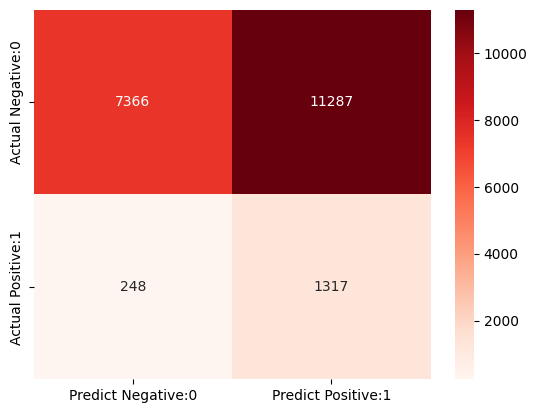

<Figure size 900x900 with 0 Axes>

In [111]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

In [112]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(40)

feature_scores

EXT_SOURCE_3                                         0.186909
EXT_SOURCE_2                                         0.159126
AMT_REQ_CREDIT_BUREAU_YEAR                           0.109478
OBS_30_CNT_SOCIAL_CIRCLE                             0.078458
OBS_60_CNT_SOCIAL_CIRCLE                             0.061409
CNT_FAM_MEMBERS                                      0.056496
employed_group_5-10                                  0.048654
employed_group_>15                                   0.041855
NAME_EDUCATION_TYPE_Higher education                 0.030995
pChange_group_>6                                     0.027813
AMT_CREDIT                                           0.025520
REGION_POPULATION_RELATIVE                           0.021339
NAME_CONTRACT_TYPE                                   0.014530
ORGANIZATION_TYPE_Education&PublicServ               0.013734
employed_group_10-15                                 0.013003
NAME_INCOME_TYPE_Pensioner                           0.012511
regist_g

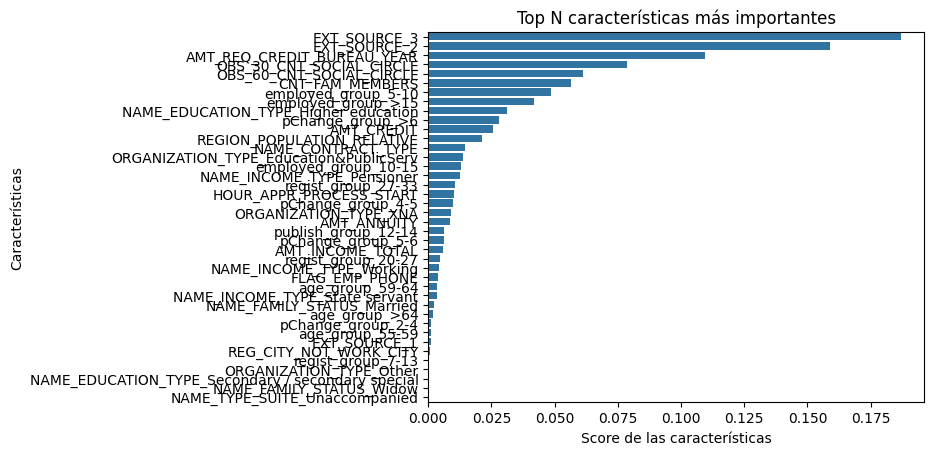

In [113]:
#Graficar las características
sns.barplot(x=feature_scores, y=feature_scores.index)

# Agregamos etiquetas al gráfico

plt.xlabel('Score de las características')

plt.ylabel('Características')

# Agregamos título al gráfico

plt.title("Top N características más importantes")

plt.show()

In [114]:
feature_scores=pd.DataFrame(feature_scores)

In [115]:
X_train = X_train[feature_scores.index]

In [116]:
X_test = X_test[feature_scores.index]

In [117]:
X_train.shape

(112421, 40)

In [118]:
X_test.shape

(20218, 40)

# 2.2. Reg logistica

In [119]:
#gridsearch para RL



dicc_grid = {
    'C': [0.001, 0.01, 0.1],  # Reducir el rango de valores para C / Valores más pequeños indican una regularización mejor y evitan sobreajuste
    'solver': ['liblinear', 'saga'],  # Solver for optimization, liblinear usado para conjunto de datos no tan grandes y saga ayuda a una mejor regularización

}

lr = LogisticRegression(max_iter=5000,random_state=0)

lr = RandomizedSearchCV(lr,
                                param_distributions= dicc_grid,
                                cv=5,
                                n_iter= 6
                                )
lr.fit(X_train, y_train)

print("Los mejores parametros son %s \ncon un score de %0.2f"
      % (lr.best_params_, lr.best_score_))

Los mejores parametros son {'solver': 'saga', 'C': 0.1} 
con un score de 0.80


In [120]:

LR = LogisticRegression(max_iter=3000,
                        solver='saga',
                        C=0.5,
                        #class_weight='balanced', método de balanceo propio del algoritmo, pero no da buen modelo
                        random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=3000, random_state=0, solver='saga')

In [121]:
y_pred = LR.predict(X_test)
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(LR.score(X_test, y_test)))

Accuracy en el set de Entrenamiento: 0.80
Accuracy en el set de Test: 0.62


In [122]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.61      0.75     18653
           1       0.13      0.68      0.21      1565

    accuracy                           0.62     20218
   macro avg       0.54      0.64      0.48     20218
weighted avg       0.89      0.62      0.70     20218



<Figure size 900x900 with 0 Axes>

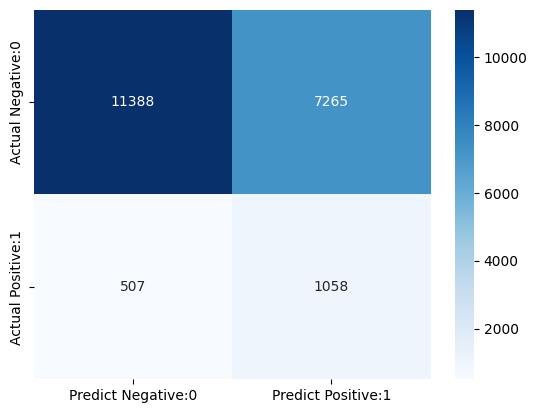

<Figure size 900x900 with 0 Axes>

In [123]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# 2.3. Naive Bayes

# 2.3.1. Gaussian

In [124]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [125]:
y_pred = gnb.predict(X_test)

print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy en el set de Entrenamiento: 0.75
Accuracy en el set de Test: 0.65


In [126]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     18653
           1       0.12      0.56      0.20      1565

    accuracy                           0.65     20218
   macro avg       0.53      0.61      0.49     20218
weighted avg       0.88      0.65      0.73     20218



<Figure size 900x900 with 0 Axes>

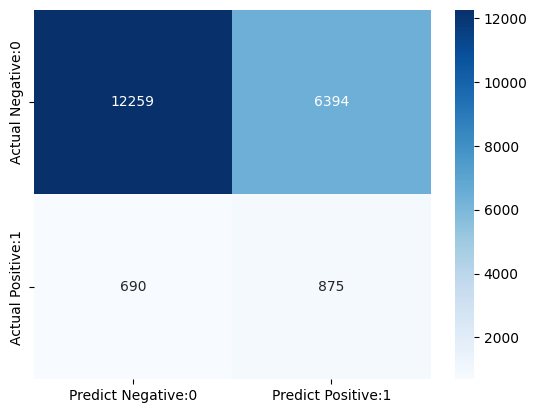

<Figure size 900x900 with 0 Axes>

In [127]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# 2.3.2. Multinomial

In [128]:
from sklearn.naive_bayes import MultinomialNB
Mult = MultinomialNB(alpha=2)
Mult.fit(X_train, y_train)
y_pred = Mult.predict(X_test)

In [129]:
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(Mult.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(Mult.score(X_test, y_test)))

Accuracy en el set de Entrenamiento: 0.71
Accuracy en el set de Test: 0.50


In [130]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.49      0.64     18653
           1       0.10      0.71      0.18      1565

    accuracy                           0.50     20218
   macro avg       0.53      0.60      0.41     20218
weighted avg       0.89      0.50      0.61     20218



<Figure size 900x900 with 0 Axes>

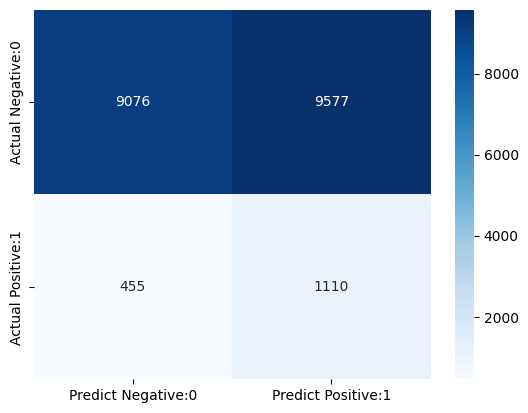

<Figure size 900x900 with 0 Axes>

In [131]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# 2.4. XGBOOST

In [132]:
#gridsearch para XGboost


dicc_grid = {
    'max_depth': [3, 5, 7], #Reducir este valor podría limitar la complejidad del modelo y evitar el sobreajuste.
    'min_child_weight': [1, 3, 5], # ayuda a prevenir divisiones que conducirían a nodos con muy pocas instancias
    'gamma': [0, 0.1, 0.2, 0.3], # valor mínimo del error para seguir particionando una hoja. Más grande, más conservador.
    'subsample': [0.8, 0.9, 1.0], #Reducir este valor podría hacer que cada árbol vea una muestra más pequeña de datos, lo que podría ayudar a reducir el sobreajuste.
    'colsample_bytree': [0.8, 0.9, 1.0], #se selecciona una pequeña fracción de características ayudar a reducir la correlación entre los árboles y mejorar la generalización
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05], #valor pequeño como 0.05 significa que se está aplicando una regularización leve para evitar el sobreajuste
    'reg_lambda': [0, 0.001, 0.005, 0.01, 0.05],  #valor pequeño como 0.005 significa que se está aplicando una regularización leve para evitar el sobreajuste
    'learning_rate': [0.01, 0.05, 0.1] #controlar la velocidad de convergencia y la estabilidad del modelo. tamaño de pasos de aprendizaje.
}

xgb = XGBClassifier(random_state=0)

xgb = RandomizedSearchCV(xgb,
                                param_distributions= dicc_grid,
                                cv=5,
                                n_iter= 20
                                )
xgb.fit(X_train, y_train)

print("Los mejores parametros son %s \ncon un score de %0.2f"
      % (xgb.best_params_, xgb.best_score_))

KeyboardInterrupt: 

In [ ]:
xgb = XGBClassifier( max_depth= 7,
                    reg_lambda= 0.005,
                    reg_alpha= 0.001,
                     min_child_weight= 5,
                     learning_rate= 0.01,
                     gamma= 0,
                     n_estimators=100,
                     colsample_bytree= 0.8,
                    random_state=0)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(xgb.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(xgb.score(X_test, y_test)))


In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
plt.figure(figsize=(9,9))

# 2.5. KNN

In [ ]:
# #gridsearch para knn

# from sklearn.model_selection import RandomizedSearchCV
# dicc_grid = {'n_neighbors':[21], #Determina # de vecinos, se utilizó esos valores para explorar un mayor rango y mejorar adaptación al conjunto de datos
#             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], #Probar el más adecuado ya que el mejor valor depende del tamaño del conjunto de nuestros datos.
#              'metric':['euclidean','minkowski'], #garantizar ajuste del modelo a la estructura de datos
#              'weights':['uniform','distance'],#determinar si asignar diferentes pesos a los vecinos mejora el rendimiento del modelo
#             }
# knn = KNeighborsClassifier()

# knn = RandomizedSearchCV(knn,
#                                 param_distributions= dicc_grid,
#                                 cv=5,
#                                 n_iter= 20
#                                 )
# knn.fit(X_train, y_train)


# print("Los mejores parametros son %s \ncon un score de %0.2f"
#       % (knn.best_params_, knn.best_score_))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=21)

In [ ]:
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [ ]:
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
                                 index=['Actual Negative:0', 'Actual Positive:1'])



sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# 2.6. SUPORT VECTOR MACHINE

Estimación de un hiperplano lineal no óptimo:

In [ ]:
# from sklearn.svm import SVC
# svc = SVC(probability=True,random_state=0)
# svc.fit(X_train, y_train)

In [ ]:
# y_pred = svc.predict(X_test)

In [ ]:
# print('Accuracy en el set de Entrenamiento: {:.2f}'
#      .format(svc.score(X_train, y_train)))
# print('Accuracy en el set de Test: {:.2f}'
#      .format(svc.score(X_test, y_test)))

In [ ]:
# print (classification_report(y_test, y_pred))

In [ ]:
# # Matriz de confusión
# cm = confusion_matrix(y_test, y_pred)
# cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
#                                  index=['Actual Negative:0', 'Actual Positive:1'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')
# plt.figure(figsize=(9,9))

In [ ]:
# #GRIDSEARCH
# from sklearn.model_selection import GridSearchCV
# param_grid = {"C":[0.1, 1, 10, 100], "gamma":[1, 0.1, 0.01, 0.001]}

In [ ]:
# grid = GridSearchCV(SVC(), param_grid, verbose=2)
# grid.fit(X_train, y_train)

# 2.6.1. Estimación con kernell lineal (hiperplano lineal óptimo):

In [ ]:
# linear_classifier = SVC(kernel='linear', probability=True,random_state=0).fit(X_train,y_train)
# y_pred = linear_classifier.predict(X_test)

In [ ]:
# print('Accuracy en el set de Entrenamiento: {:.2f}'
#      .format(linear_classifier.score(X_train, y_train)))
# print('Accuracy en el set de Test: {:.2f}'
#      .format(linear_classifier.score(X_test, y_test)))

In [ ]:
# print(classification_report(y_test,y_pred))

In [ ]:

# # Matriz de confusión para SVM Linear Kernel
# cm = confusion_matrix(y_test, y_pred)
# cm_matrix = pd.DataFrame(data=cm,columns=['Predict Negative:0', 'Predict Positive:1'],
#                                  index=['Actual Negative:0', 'Actual Positive:1'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# 2.6.2. Estimación con kernell Gaussian RBF:

In [ ]:
# rbf_svc=SVC(kernel='rbf',probability=True,random_state=0).fit(X_train,y_train)
# y_pred = rbf_svc.predict(X_test)

In [ ]:
# print('Accuracy en el set de Entrenamiento: {:.2f}'
#      .format(rbf_svc.score(X_train, y_train)))
# print('Accuracy en el set de Test: {:.2f}'
#      .format(rbf_svc.score(X_test, y_test)))

In [ ]:
# print(classification_report(y_test,y_pred))

In [ ]:
# # Matriz de confusión Gaussian RBF
# cm = confusion_matrix(y_test, y_pred)
# cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
#                                  index=['Actual Negative:0', 'Actual Positive:1'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# 2.6.3. Estimación con kernell Polynomial:

In [ ]:
# Poly_svc=SVC(kernel='poly',probability=True,random_state=0).fit(X_train,y_train)
# y_pred = Poly_svc.predict(X_test)

In [ ]:
# print('Accuracy en el set de Entrenamiento: {:.2f}'
#      .format(Poly_svc.score(X_train, y_train)))
# print('Accuracy en el set de Test: {:.2f}'
#      .format(Poly_svc.score(X_test, y_test)))

In [ ]:
# print(classification_report(y_test,y_pred))

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
#                                  index=['Actual Negative:0', 'Actual Positive:1'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')


# 2.6.4. Estimación con kernell Sigmoid:

In [ ]:
# Sig_svc=SVC(kernel='sigmoid',probability=True,random_state=0).fit(X_train,y_train)
# y_pred = Sig_svc.predict(X_test)

In [ ]:
# print('Accuracy en el set de Entrenamiento: {:.2f}'
#      .format(Sig_svc.score(X_train, y_train)))
# print('Accuracy en el set de Test: {:.2f}'
#      .format(Sig_svc.score(X_test, y_test)))

In [ ]:
# print(classification_report(y_test,y_pred))

In [ ]:
# # Matriz de confusión Sigmoid
# cm = confusion_matrix(y_test, y_pred)
# cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
#                                  index=['Actual Negative:0', 'Actual Positive:1'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# 2.7. DECISION TREE

In [ ]:
#gridsearch para decision tree


dicc_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree, Reducir este valor podría limitar la complejidad del modelo y evitar sobreajuste
    'min_samples_split': [2, 5, 10],  #especifica el número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # significa que cada hoja del árbol debe contener al menos x muestras. aumentar este valor puede evitar que el árbol se ramifique demasiado y reducir el sobreajuste
    'max_features': [ 'sqrt', 'log2']  # Number of features to consider for the best split. Reducir el número de características consideradas en cada división puede ayudar a evitar el sobreajuste
}

dt = DecisionTreeClassifier(random_state=0)

dt = RandomizedSearchCV(dt,
                                param_distributions= dicc_grid,
                                cv=5,
                                n_iter= 20
                                )
dt.fit(X_train, y_train)

print("Los mejores parametros son %s \ncon un score de %0.2f"
      % (dt.best_params_, dt.best_score_))

In [ ]:

clf_gini = DecisionTreeClassifier(criterion='gini',
                                  min_samples_split= 2,
                                  min_samples_leaf= 1,
                                  max_depth=30,
                                  max_features='log2',
                                  random_state=0)

clf_gini.fit(X_train, y_train)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

In [ ]:

print (classification_report(y_test, y_pred_gini))

In [ ]:
cm = confusion_matrix(y_test, y_pred_gini)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))

# 2.8. Red neuronal de Perceptrón Multicapa

In [ ]:
#gridsearch para MLP


dicc_grid = {
    'hidden_layer_sizes': [(20,), (40,)],#diferentes nros de capas y neuronas, multiplos de cantidad de columnas del set de train
    'solver': ['sgd', 'adam'],# Se prueban dos opciones comunes (sgd y adam) para encontrar cuál converge más rápido y produce mejores resultados.
    'alpha': [0.0001,0.01],#indica regularización
    'learning_rate': ['constant', 'invscaling', 'adaptive'] #tasa con la que aprende el modelo
 }

mlp = MLPClassifier(random_state=0)

mlp = RandomizedSearchCV(mlp,
                                 param_distributions= dicc_grid,
                                 cv=5,
                                 n_iter= 10
                                 )
mlp.fit(X_train, y_train)

print("Los mejores parametros son %s \ncon un score de %0.2f"
       % (mlp.best_params_, mlp.best_score_))

In [141]:
mlp = MLPClassifier(solver= 'adam',
                    learning_rate= 'constant',
                    hidden_layer_sizes= (20,),
                    alpha= 0.0001,
                    activation= 'logistic',
                    random_state=0,
                    learning_rate_init = 0.001,
                     max_iter=1000)

In [142]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [143]:
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(mlp.score(X_test, y_test)))

Accuracy en el set de Entrenamiento: 0.83
Accuracy en el set de Test: 0.65


In [144]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.65      0.78     18653
           1       0.13      0.62      0.22      1565

    accuracy                           0.65     20218
   macro avg       0.54      0.64      0.50     20218
weighted avg       0.89      0.65      0.73     20218



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'],
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')
plt.figure(figsize=(9,9))